##  Análisis General del Dataset

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import os



## Cargarmos los Datasets

In [81]:
# Cargar dataset SELL-IN desde archivo CSV
sellin_path = "sell-in.txt"  
df_sellin = pd.read_csv(sellin_path)

df_sellin = pd.read_csv("sell-in.txt", sep="\t")  # o el separador correcto
print(df_sellin.columns)

# Cargar tabla de productos
productos_path = "tb_productos.txt"
df_productos = pd.read_csv(productos_path, sep="\t")

print(df_productos.columns)
df_productos.shape


# Cargar tabla de stock solo si existe el archivo
stock_path = "tb_stocks.txt"
df_stocks = pd.read_csv(stock_path, sep="\t") 

Index(['periodo', 'customer_id', 'product_id', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn'], dtype='object')
Index(['cat1', 'cat2', 'cat3', 'brand', 'sku_size', 'product_id'], dtype='object')


In [82]:
print("Primeras filas del dataset:")
print(df_sellin.head())
print("\nUltimas filas del dataset:")
print(df_sellin.tail())
print("\nFilas aleatorias del dataset:")
print(df_sellin.sample(n=5))
print("\nDimensiones del dataset:", df_sellin.shape)
print("\nTipos de datos en el dataset:")
print(df_sellin.dtypes)
print(("\nValores nulos en el dataset:"))
print(df_sellin.isnull().sum())
print("\nEstadísticas descriptivas del dataset:")
print(df_sellin.describe(include='all'))

Primeras filas del dataset:
   periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  cust_request_tn       tn
0   201701        10234       20524                      0                 2          0.05300  0.05300
1   201701        10032       20524                      0                 1          0.13628  0.13628
2   201701        10217       20524                      0                 1          0.03028  0.03028
3   201701        10125       20524                      0                 1          0.02271  0.02271
4   201701        10012       20524                      0                11          1.54452  1.54452

Ultimas filas del dataset:
         periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  cust_request_tn       tn
2945813   201912        10105       20853                      0                 1          0.02230  0.02230
2945814   201912        10092       20853                      0                 1          0.00669  0.00669

In [83]:
print("Primeras filas del dataset:")
print(df_productos.head())
print("\nUltimas filas del dataset:")
print(df_productos.tail())
print("\nFilas aleatorias del dataset:")
print(df_productos.sample(n=5))
print("\nDimensiones del dataset:", df_productos.shape)
print("\nTipos de datos en el dataset:")
print(df_productos.dtypes)
print(("\nValores nulos en el dataset:"))
print(df_productos.isnull().sum())
print("\nEstadísticas descriptivas del dataset:")
print(df_productos.describe(include='all'))
print("\nDimensiones del dataset:",df_productos.shape)

Primeras filas del dataset:
  cat1         cat2     cat3    brand  sku_size  product_id
0   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20280
1   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20180
2   HC  ROPA LAVADO  Liquido  LIMPIEX       120       20332
3   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20222
4   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20288

Ultimas filas del dataset:
       cat1            cat2        cat3   brand  sku_size  product_id
1257  FOODS  SOPAS Y CALDOS  Caldo Cubo  MAGGI2        12       20240
1258  FOODS  SOPAS Y CALDOS  Caldo Cubo  MAGGI2         6       20285
1259  FOODS  SOPAS Y CALDOS  Caldo Cubo  MAGGI2         2       20259
1260  FOODS  SOPAS Y CALDOS  Caldo Cubo  MAGGI2        12       20142
1261  FOODS  SOPAS Y CALDOS  Caldo Cubo  MAGGI2         6       20890

Filas aleatorias del dataset:
       cat1            cat2              cat3     brand  sku_size  product_id
527      PC            DEOS              Aero     DEOS2

In [84]:
print("Primeras filas del dataset:")
print(df_stocks.head())
print("\nUltimas filas del dataset:")
print(df_stocks.tail())
print("\nFilas aleatorias del dataset:")
print(df_stocks.sample(n=5))
print("\nDimensiones del dataset:", df_stocks.shape)
print("\nTipos de datos en el dataset:")
print(df_stocks.dtypes)
print(("\nValores nulos en el dataset:"))
print(df_stocks.isnull().sum())
print("\nEstadísticas descriptivas del dataset:")
print(df_stocks.describe(include='all'))
print("\nDimensiones del dataset:",df_stocks.shape)

Primeras filas del dataset:
   periodo  product_id  stock_final
0   201810       20524      1.61267
1   201810       20311      2.93657
2   201810       20654      6.83269
3   201810       21005      1.01338
4   201810       20974      0.34595

Ultimas filas del dataset:
       periodo  product_id  stock_final
13686   201912       20453      1.43741
13687   201912       21026      7.26817
13688   201912       21054      0.50833
13689   201912       20981      2.18491
13690   201912       20853      1.82373

Filas aleatorias del dataset:
       periodo  product_id  stock_final
4058    201902       20821      1.02268
12190   201911       20020     40.01088
11658   201910       20694      3.30024
1284    201811       20026     97.77957
13308   201912       20777      0.18405

Dimensiones del dataset: (13691, 3)

Tipos de datos en el dataset:
periodo          int64
product_id       int64
stock_final    float64
dtype: object

Valores nulos en el dataset:
periodo        0
product_id     0
st

In [85]:
#configuración de visualizaion 
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = 12, 6

In [86]:
print('Resumen general de columnas numéricas:')
df_sellin.describe()

print('Valores únicos por columna:')
df_sellin.nunique()

print('Valores nulos por columna:')
df_sellin.isnull().sum()

print('Cantidad de registros duplicados:')
df_sellin.duplicated().sum()

Resumen general de columnas numéricas:
Valores únicos por columna:
Valores nulos por columna:
Cantidad de registros duplicados:


0

## Evolución de las ventas de los productos que representan el 80% del total de tn vendidas 

In [87]:
df_sellin.columns = df_sellin.columns.str.strip().str.lower().str.replace(" ", "_")
# Esperar a que df_productos esté definido antes de limpiar sus columnas


/var/folders/yp/cyy5yk8j11g984vg2n1w2l_w0000gn/T/ipykernel_59463/2073087268.py:20: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



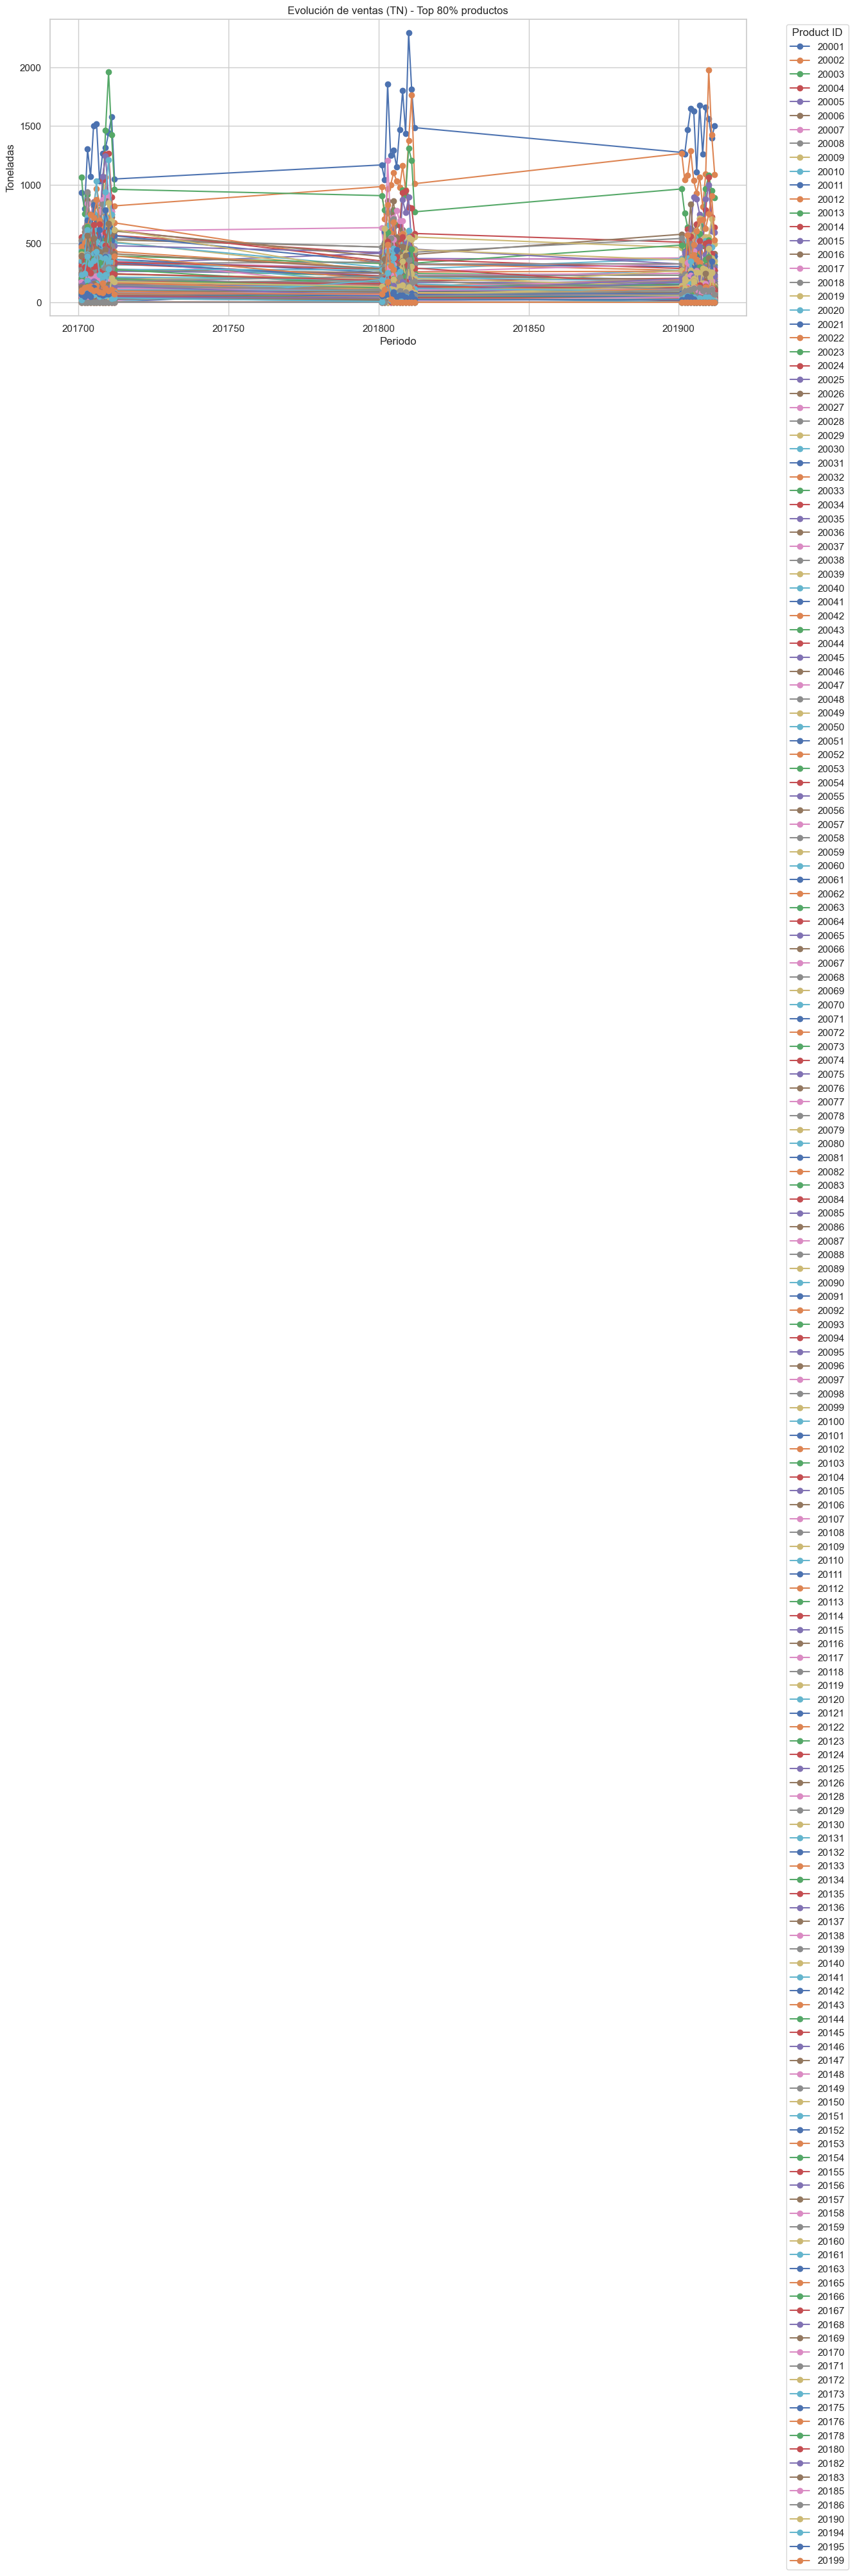

In [88]:


# Agrupar y calcular top 80%
ventas_por_producto = df_sellin.groupby("product_id")["tn"].sum().sort_values(ascending=False)
ventas_totales = ventas_por_producto.sum()
ventas_acumuladas = ventas_por_producto.cumsum()
productos_top_80 = ventas_acumuladas[ventas_acumuladas <= 0.8 * ventas_totales].index

# Filtrar dataset y agrupar por periodo y producto
df_top_80 = df_sellin[df_sellin["product_id"].isin(productos_top_80)]
df_evolucion = df_top_80.groupby(["periodo", "product_id"])["tn"].sum().reset_index()

# Pivot para graficar
df_pivot = df_evolucion.pivot(index="periodo", columns="product_id", values="tn").fillna(0)

# Graficar
df_pivot.plot(figsize=(14, 6), marker='o')
plt.title("Evolución de ventas (TN) - Top 80% productos")
plt.xlabel("Periodo")
plt.ylabel("Toneladas")
plt.legend(title="Product ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


## Análsis de Ventas totales por período y por año 

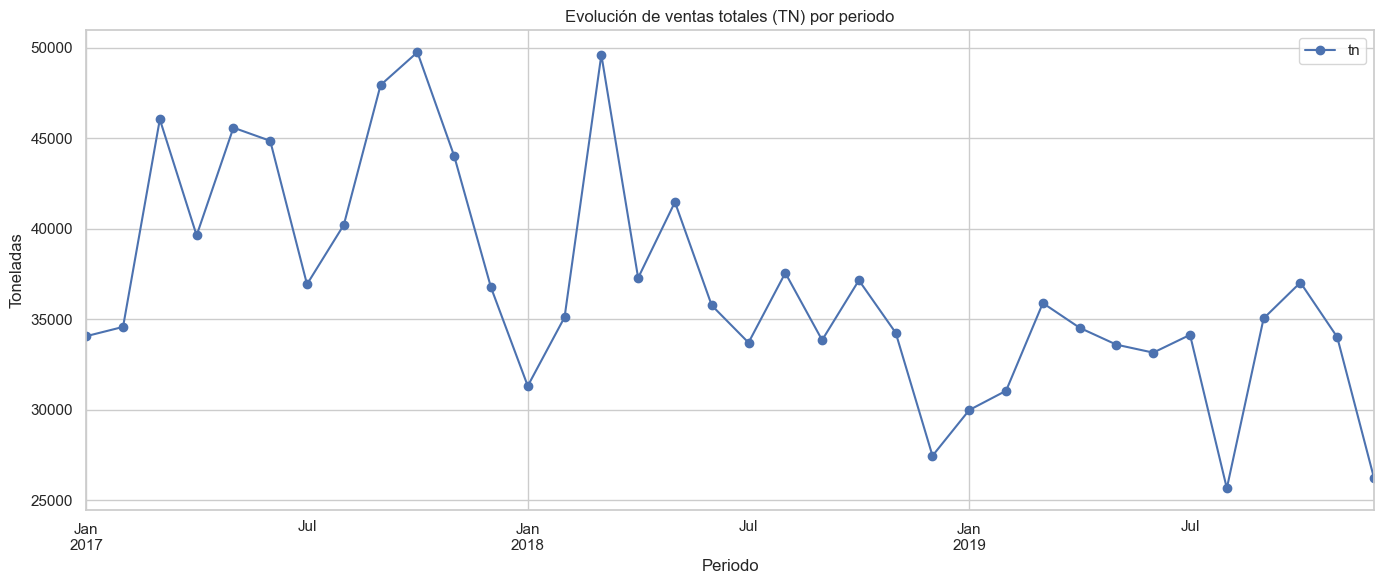

Ventas totales: 1324988.5884099994


In [89]:
# Calcular las ventas totales por periodo
ventas_por_periodo = df_sellin.groupby("periodo")["tn"].sum().reset_index()
ventas_por_periodo["periodo"] = pd.to_datetime(ventas_por_periodo["periodo"].astype(str), format="%Y%m")
# Graficar la evolución de las ventas totales
ventas_por_periodo.plot(x="periodo", y="tn", marker='o', figsize=(14, 6))
plt.title("Evolución de ventas totales (TN) por periodo")
plt.xlabel("Periodo")
plt.ylabel("Toneladas")
plt.grid(True)
plt.tight_layout()
plt.show()
ventas_totales = df_sellin["tn"].sum()
print("Ventas totales:", ventas_totales)

In [90]:
cantidad_periodos = df_sellin["periodo"].nunique()
print("Cantidad de periodos:", cantidad_periodos)

Cantidad de periodos: 36


In [91]:
ventas_por_periodo = df_sellin.groupby("periodo")["tn"].sum()
print(ventas_por_periodo)


periodo
201701    34057.31784
201702    34568.65311
201703    46040.59636
201704    39625.52445
201705    45579.63296
201706    44853.30050
201707    36925.20583
201708    40206.38305
201709    47934.65801
201710    49750.29319
201711    44016.26586
201712    36752.63501
201801    31304.63253
201802    35102.81844
201803    49608.26718
201804    37277.36210
201805    41466.99618
201806    35758.98480
201807    33699.70259
201808    37553.11923
201809    33840.68678
201810    37144.45821
201811    34244.88145
201812    27446.44548
201901    29976.63108
201902    31040.41869
201903    35886.34281
201904    34520.09273
201905    33588.29821
201906    33147.50439
201907    34130.17318
201908    25652.96118
201909    35040.08141
201910    37022.56717
201911    34007.62914
201912    26217.06728
Name: tn, dtype: float64


In [92]:
# Extraer el año de la columna 'periodo' y calcular ventas totales por año
df_sellin['anio'] = df_sellin['periodo'] // 100
ventas_por_anio = df_sellin.groupby('anio')['tn'].sum()
print(ventas_por_anio)

anio
2017    500310.46617
2018    434448.35497
2019    390229.76727
Name: tn, dtype: float64


## Generamos un dataframe unificado de sellin y productos para análisis

In [93]:


# Asegurarse de que 'product_id' es string en ambos DataFrames
df_sellin["product_id"] = df_sellin["product_id"].astype(str).str.strip()
df_productos["product_id"] = df_productos["product_id"].astype(str).str.strip()

# Merge para crear df_joined
df_joined = df_sellin.merge(df_productos, on="product_id", how="left")

# Revisión general del DataFrame
resumen_eda = {
    "Cantidad total de registros": len(df_joined),
    "Cantidad de columnas": df_joined.shape[1],
    "Cantidad de productos únicos": df_joined["product_id"].nunique(),
    "Cantidad de clientes únicos": df_joined["customer_id"].nunique(),
    "Cantidad de periodos únicos": df_joined["periodo"].nunique(),
    "Cantidad de categorías (cat1) únicas": df_joined["cat1"].nunique(),
    "Rango de toneladas (tn)": (
        df_joined["tn"].min(),
        df_joined["tn"].max()
    ),
    "Columnas con valores nulos": df_joined.isnull().sum()[df_joined.isnull().sum() > 0].to_dict()
}

# Valores más frecuentes por categoría (cat1), marca y tamaño
valores_frecuentes = {
    "Top 5 categorías (cat1)": df_joined["cat1"].value_counts().head(5).to_dict(),
    "Top 5 marcas": df_joined["brand"].value_counts().head(5).to_dict(),
    "Top 5 tamaños (sku_size)": df_joined["sku_size"].value_counts().head(5).to_dict(),
}

# Tipos de datos
tipos_datos = df_joined.dtypes.astype(str).to_dict()

# Agrupación por periodo para evolución temporal total
evolucion_periodo = df_joined.groupby("periodo")["tn"].sum().reset_index()

# Mostrar resumen y valores frecuentes
(resumen_eda, valores_frecuentes, tipos_datos, evolucion_periodo.head())


({'Cantidad total de registros': 2988650,
  'Cantidad de columnas': 13,
  'Cantidad de productos únicos': 1233,
  'Cantidad de clientes únicos': 597,
  'Cantidad de periodos únicos': 36,
  'Cantidad de categorías (cat1) únicas': 4,
  'Rango de toneladas (tn)': (0.0001, 547.87849),
  'Columnas con valores nulos': {'cat1': 7448,
   'cat2': 7448,
   'cat3': 7448,
   'brand': 7448,
   'sku_size': 7448}},
 {'Top 5 categorías (cat1)': {'PC': 1657313,
   'HC': 746562,
   'FOODS': 571148,
   'REF': 6179},
  'Top 5 marcas': {'NIVEA': 384335,
   'SHAMPOO3': 338209,
   'MAGGI': 322839,
   'DEOS1': 299785,
   'MUSCULO': 242680},
  'Top 5 tamaños (sku_size)': {200.0: 306300,
   400.0: 214118,
   350.0: 200788,
   90.0: 173479,
   50.0: 155471}},
 {'periodo': 'int64',
  'customer_id': 'int64',
  'product_id': 'object',
  'plan_precios_cuidados': 'int64',
  'cust_request_qty': 'int64',
  'cust_request_tn': 'float64',
  'tn': 'float64',
  'anio': 'int64',
  'cat1': 'object',
  'cat2': 'object',
  'cat


Tabla de toneladas vendidas por año y categoría:

cat1      FOODS         HC        PC    REF
anio                                       
2017  100667.79  333990.05  95994.71  40.72
2018   92596.29  278168.16  82840.37  32.52
2019   86263.54  245807.13  78438.01  23.72


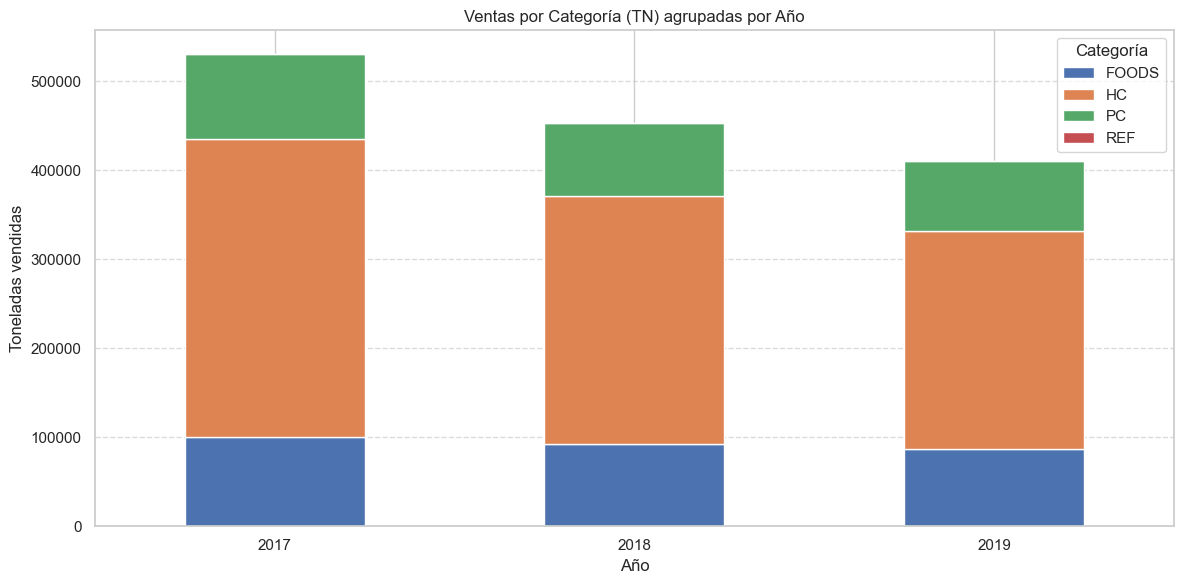

In [94]:


# Usamos la columna TN para el análisis
columna_tn = "tn" if "tn" in df_joined.columns else "tn"

# Extraer el año desde periodo
df_joined["anio"] = df_joined["periodo"].astype(str).str[:4]

# Agrupar por año y categoría y sumar toneladas
ventas_cat_anio = df_joined.groupby(["anio", "cat1"])[columna_tn].sum().reset_index()

# Mostrar la tabla en consola
print("\nTabla de toneladas vendidas por año y categoría:\n")
print(ventas_cat_anio.pivot(index="anio", columns="cat1", values=columna_tn).fillna(0).round(2))

# Crear tabla pivot para el gráfico
df_cat_pivot = ventas_cat_anio.pivot(index="anio", columns="cat1", values=columna_tn).fillna(0)

# Graficar
df_cat_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Ventas por Categoría (TN) agrupadas por Año")
plt.xlabel("Año")
plt.ylabel("Toneladas vendidas")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



Tabla de toneladas vendidas por periodo y categoría:

cat1        FOODS        HC        PC   REF
periodo                                    
201701    6826.16  21686.66   7197.38  8.98
201702    7730.78  21633.84   7267.09  2.61
201703    8133.52  31003.51   9512.42  3.42
201704    7836.44  26337.52   7890.76  3.89
201705    8283.17  31649.88   8547.64  3.64
201706    7894.51  31378.89   8332.00  1.97
201707    6937.76  25916.08   6406.23  1.99
201708    8701.50  26774.46   6949.09  3.78
201709   10737.54  32273.10   8236.92  3.39
201710   11441.44  32472.50   9424.42  2.62
201711    9105.70  28520.06   8917.39  2.56
201712    7039.28  24343.55   7313.36  1.86
201801    5373.17  20247.22   7040.87  1.71
201802    6983.05  22777.74   7188.14  0.93
201803    9884.70  31727.11  10556.85  3.00
201804    7873.18  23425.53   7279.44  2.64
201805    9019.48  26472.78   7615.82  3.80
201806    7288.37  22705.58   7383.15  4.03
201807    7140.89  21804.81   6220.76  3.40
201808    8651.62  24

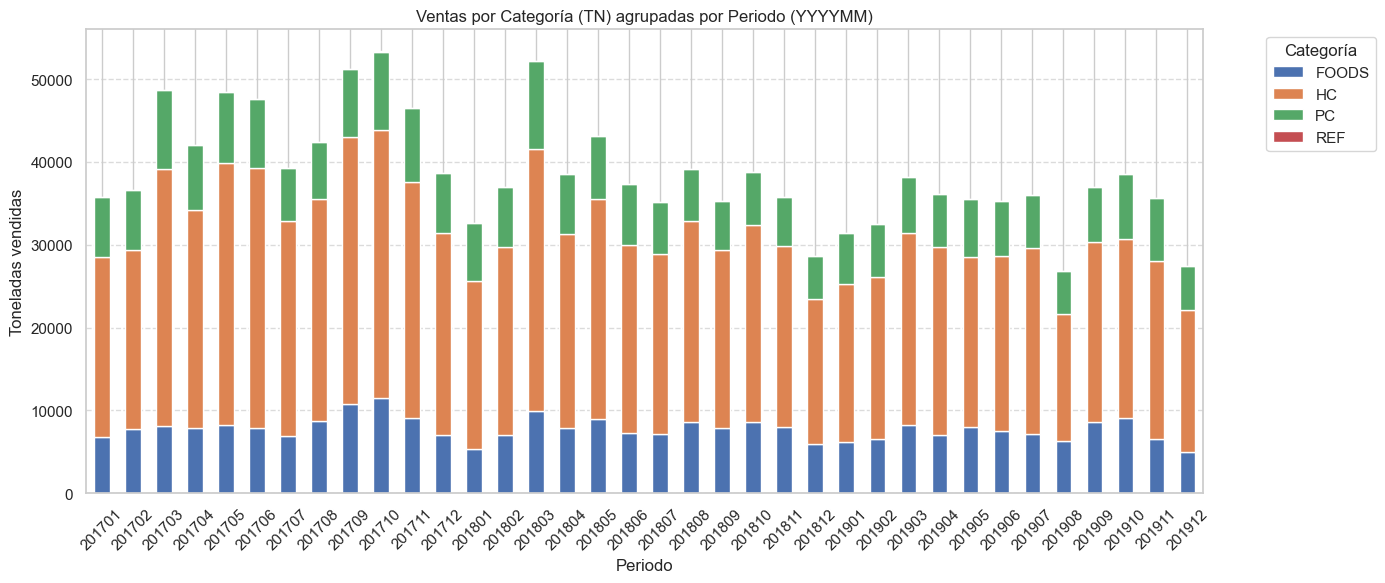

In [95]:


# Usamos la columna correcta
columna_tn = "tn" if "tn" in df_joined.columns else "tn"

# Asegurarse de que 'periodo' es string para ordenar bien
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Agrupar por periodo y categoría y sumar toneladas
ventas_cat_periodo = df_joined.groupby(["periodo", "cat1"])[columna_tn].sum().reset_index()

# Mostrar la tabla en consola
print("\nTabla de toneladas vendidas por periodo y categoría:\n")
print(ventas_cat_periodo.pivot(index="periodo", columns="cat1", values=columna_tn).fillna(0).round(2))

# Crear tabla pivot para el gráfico
df_cat_pivot = ventas_cat_periodo.pivot(index="periodo", columns="cat1", values=columna_tn).fillna(0)

# Graficar
df_cat_pivot.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Ventas por Categoría (TN) agrupadas por Periodo (YYYYMM)")
plt.xlabel("Periodo")
plt.ylabel("Toneladas vendidas")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


2025-05-27 21:11:39,359 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:11:39,650 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


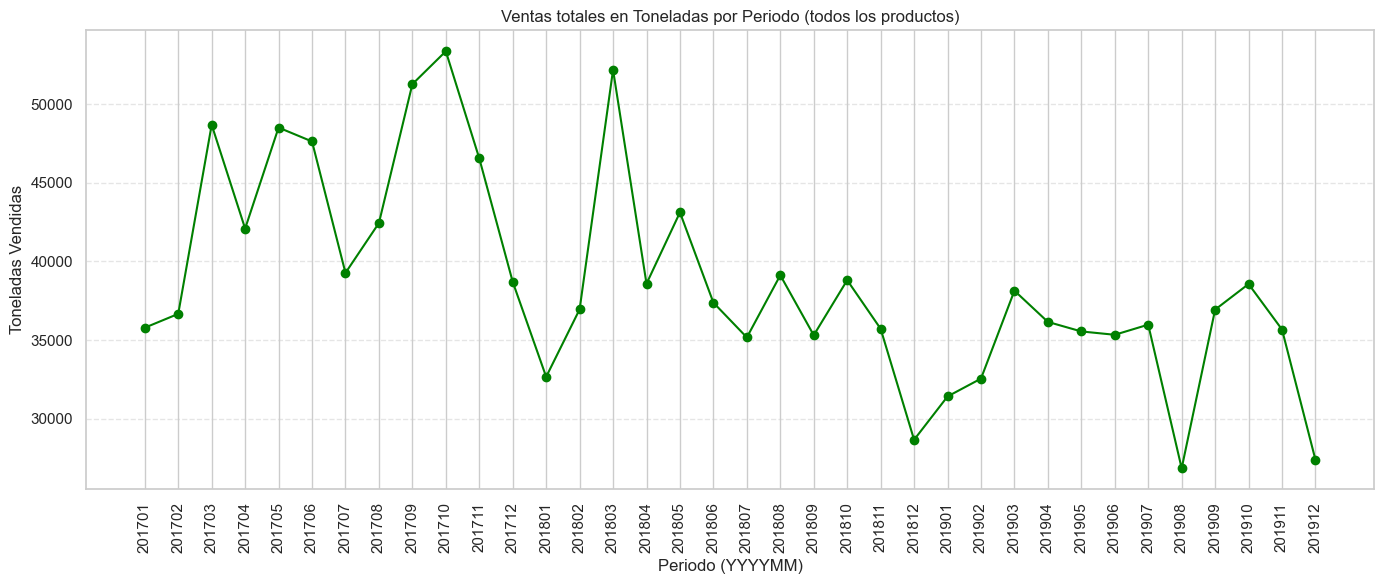

In [96]:


# Asegurar que 'periodo' es string para orden correcto en el eje X
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Agrupar por periodo y sumar toneladas totales (sin categoría)
columna_tn = "tn" if "tn" in df_joined.columns else "tn"
ventas_totales = df_joined.groupby("periodo")[columna_tn].sum().reset_index()

# Crear gráfico tipo línea con puntos
plt.figure(figsize=(14, 6))
plt.plot(ventas_totales["periodo"], ventas_totales[columna_tn], color='green', marker='o')
plt.title("Ventas totales en Toneladas por Periodo (todos los productos)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2025-05-27 21:12:34,651 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:12:34,767 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:12:35,037 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:12:35,275 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


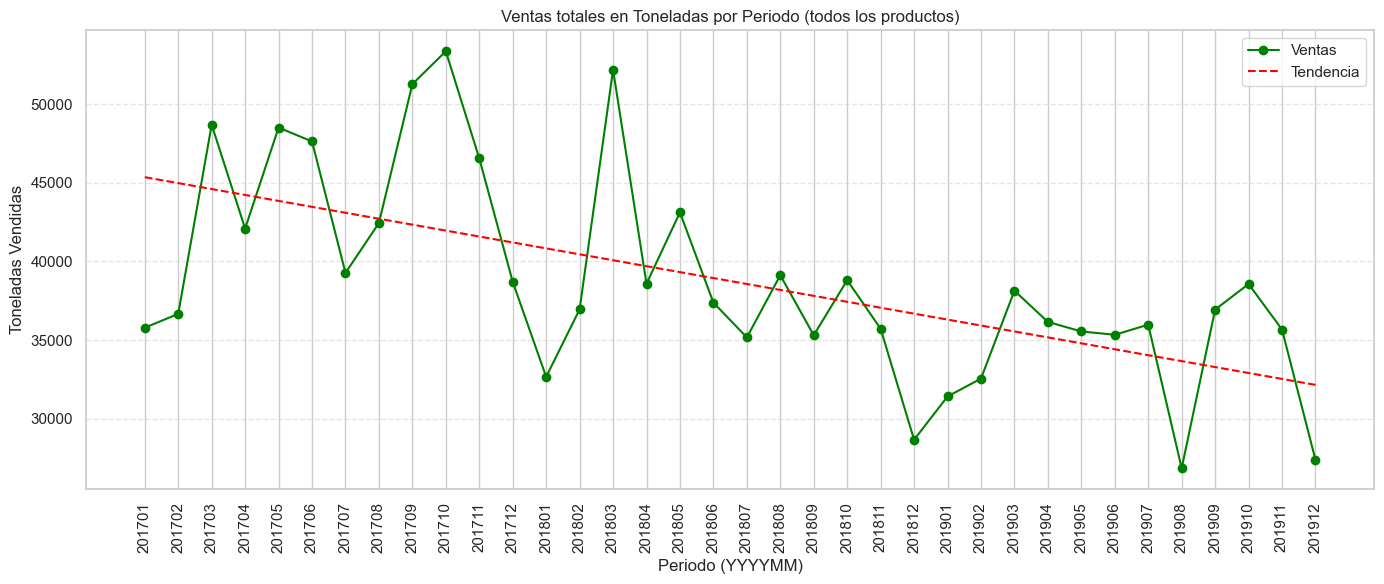

In [97]:


# Asegurar que 'periodo' es string
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Agrupar por periodo y sumar toneladas totales
columna_tn = "tn" if "tn" in df_joined.columns else "tn"
ventas_totales = df_joined.groupby("periodo")[columna_tn].sum().reset_index()

# Crear un eje X numérico para ajustar tendencia
ventas_totales["x"] = np.arange(len(ventas_totales))

# Ajustar línea de tendencia lineal (grado 1)
z = np.polyfit(ventas_totales["x"], ventas_totales[columna_tn], 1)
tendencia = np.poly1d(z)

# Crear gráfico
plt.figure(figsize=(14, 6))
plt.plot(ventas_totales["periodo"], ventas_totales[columna_tn], color='green', marker='o', label="Ventas")
plt.plot(ventas_totales["periodo"], tendencia(ventas_totales["x"]), color='red', linestyle="--", label="Tendencia")
plt.title("Ventas totales en Toneladas por Periodo (todos los productos)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


2025-05-27 21:13:18,316 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:13:18,546 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:13:18,639 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:13:18,773 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


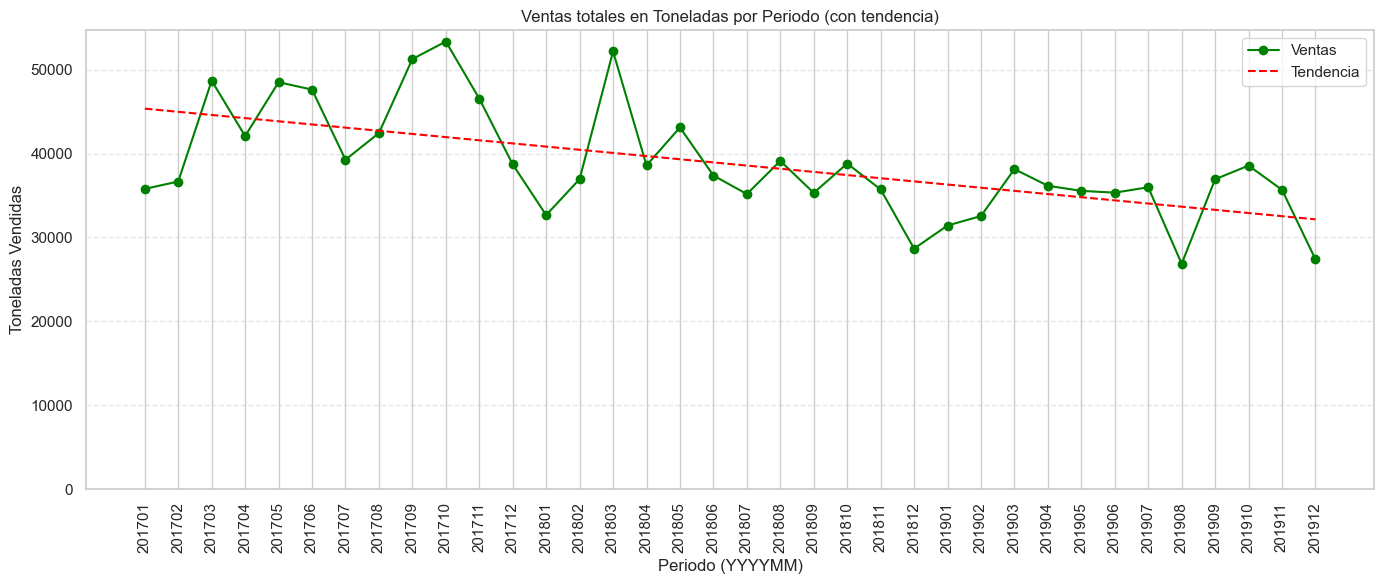

In [98]:

# Asegurar que 'periodo' es string
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Agrupar por periodo y sumar toneladas totales
columna_tn = "tn" if "tn" in df_joined.columns else "tn"
ventas_totales = df_joined.groupby("periodo")[columna_tn].sum().reset_index()

# Eje X numérico
ventas_totales["x"] = np.arange(len(ventas_totales))

# Ajuste de línea de tendencia (normal, no forzada)
z = np.polyfit(ventas_totales["x"], ventas_totales[columna_tn], 1)
tendencia = np.poly1d(z)

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_totales["periodo"], ventas_totales[columna_tn], color='green', marker='o', label="Ventas")
plt.plot(ventas_totales["periodo"], tendencia(ventas_totales["x"]), color='red', linestyle="--", label="Tendencia")
plt.title("Ventas totales en Toneladas por Periodo (con tendencia)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)  # 👈 escalar el eje Y desde 0
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


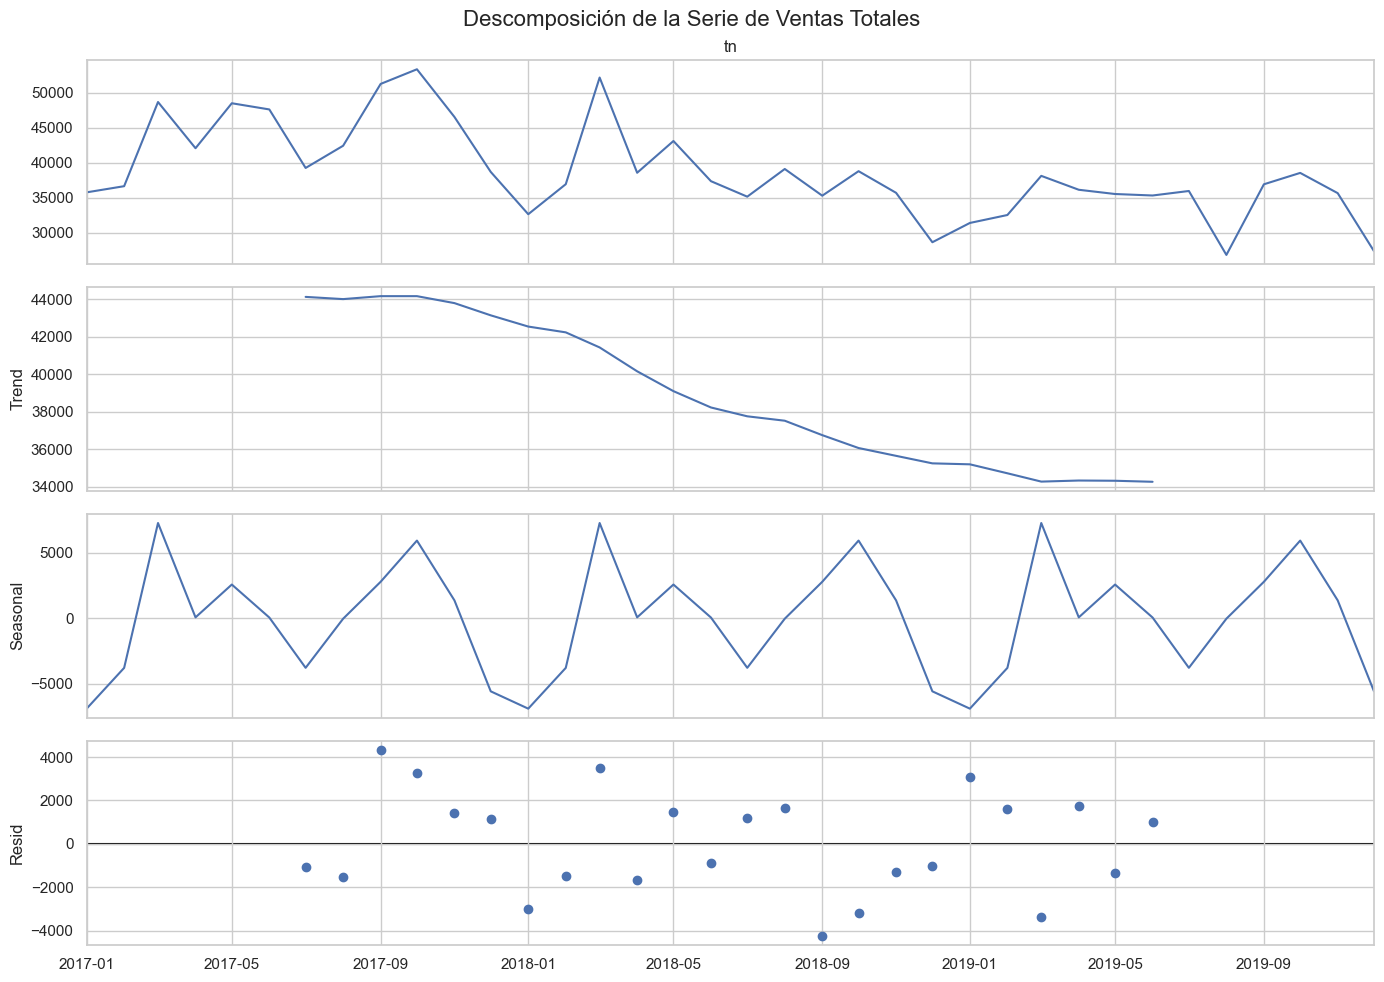

In [99]:


# Agrupar por periodo y sumar toneladas totales
ventas_totales = df_joined.groupby("periodo")["tn"].sum().reset_index()

# Convertir 'periodo' a datetime y setear como índice
ventas_totales["periodo"] = pd.to_datetime(ventas_totales["periodo"], format="%Y%m")
ventas_totales.set_index("periodo", inplace=True)
ventas_totales = ventas_totales.asfreq("MS")  # frecuencia mensual

# Descomposición aditiva con ciclo anual (12 meses)
descomposicion = seasonal_decompose(ventas_totales["tn"], model="additive", period=12)

# Graficar los componentes
fig = descomposicion.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Descomposición de la Serie de Ventas Totales", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


2025-05-27 21:14:28,857 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:14:29,054 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:14:29,104 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:14:29,270 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:14:29,484 - INFO     - Using categorical units to plot a list of strings that 

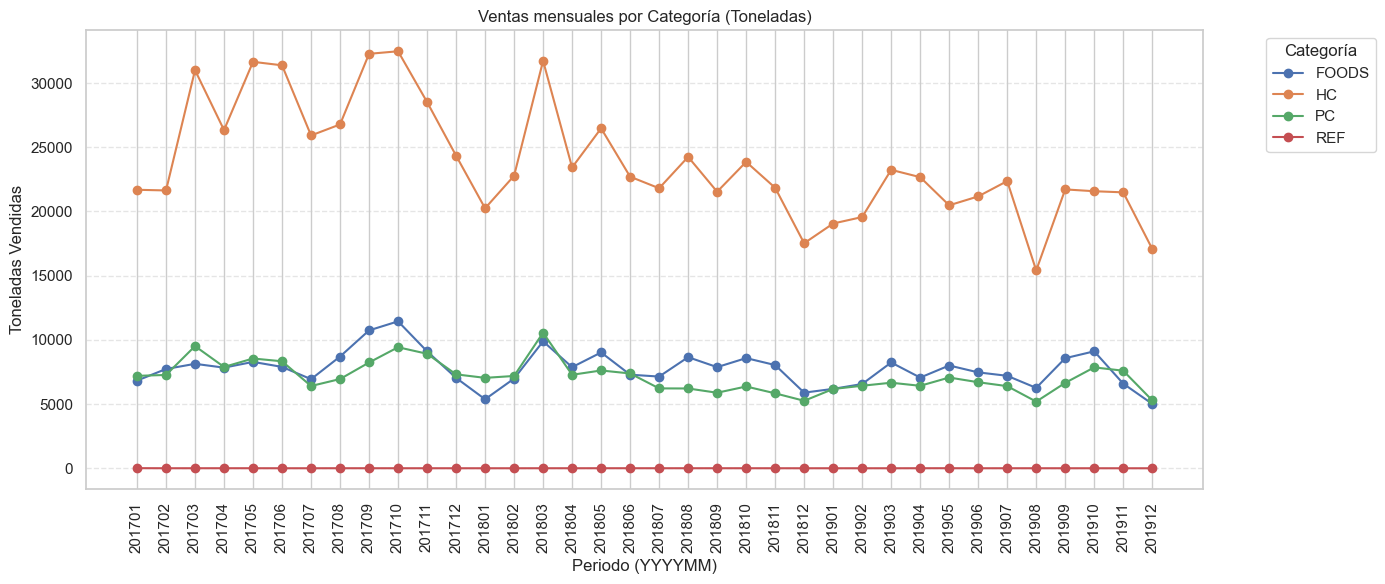

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que los IDs sean texto
df_sellin["product_id"] = df_sellin["product_id"].astype(str).str.strip()
df_productos["product_id"] = df_productos["product_id"].astype(str).str.strip()

# Merge para agregar info de productos
df_joined = df_sellin.merge(df_productos, on="product_id", how="left")

# Filtrar registros con categoría y toneladas válidas
df_joined = df_joined[df_joined["cat1"].notna() & df_joined["tn"].notna()].copy()

# Asegurar que periodo sea string
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Agrupar por periodo y categoría
ventas_cat_periodo = df_joined.groupby(["periodo", "cat1"])["tn"].sum().reset_index()

# Pivot para graficar una línea por categoría
df_cat_pivot = ventas_cat_periodo.pivot(index="periodo", columns="cat1", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 6))
for col in df_cat_pivot.columns:
    plt.plot(df_cat_pivot.index, df_cat_pivot[col], marker='o', label=col)

plt.title("Ventas mensuales por Categoría (Toneladas)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [101]:
df_sellin["product_id"].isin(df_productos["product_id"]).value_counts()



product_id
True     2938370
False       7448
Name: count, dtype: int64

In [102]:
# Convertir a string sin espacios y sin ceros a la izquierda
df_sellin["product_id"] = df_sellin["product_id"].astype(str).str.strip()
df_productos["product_id"] = df_productos["product_id"].astype(str).str.strip()

# Hacer el merge
df_joined = df_sellin.merge(df_productos, on="product_id", how="left")

# Ver cuántos registros tienen categoría ahora
df_validos = df_joined[df_joined["cat1"].notna()]
print("Coincidencias válidas con categoría:", len(df_validos))


Coincidencias válidas con categoría: 2981202


In [103]:
# Verificar valores únicos antes del merge
df_sellin["periodo"].dropna().unique()


array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912])

In [104]:
import pandas as pd

# Asegurarte de que ambas columnas product_id estén como string
df_sellin["product_id"] = df_sellin["product_id"].astype(str).str.strip()
df_productos["product_id"] = df_productos["product_id"].astype(str).str.strip()

# Hacer el merge
df_joined = df_sellin.merge(df_productos, on="product_id", how="left")

# Filtrar registros con categoría no nula
df_validos = df_joined[df_joined["cat1"].notna()].copy()

# Extraer el año desde el campo 'periodo'
df_validos["anio"] = df_validos["periodo"].astype(str).str[:4].astype(int)

# Agrupar por año y categoría y sumar toneladas
ventas_cat_anio = df_validos.groupby(["anio", "cat1"])["tn"].sum().reset_index()

# Calcular variación porcentual año a año por categoría
ventas_cat_anio["variacion_pct"] = ventas_cat_anio.groupby("cat1")["tn"].pct_change() * 100

# Mostrar resultados
print(ventas_cat_anio.head(10))


   anio   cat1            tn  variacion_pct
0  2017  FOODS  100667.79096            NaN
1  2017     HC  333990.05312            NaN
2  2017     PC   95994.70608            NaN
3  2017    REF      40.72076            NaN
4  2018  FOODS   92596.29289      -8.017955
5  2018     HC  278168.16325     -16.713638
6  2018     PC   82840.37312     -13.703186
7  2018    REF      32.51826     -20.143288
8  2019  FOODS   86263.53588      -6.839104
9  2019     HC  245807.12627     -11.633624


<Figure size 1400x600 with 0 Axes>

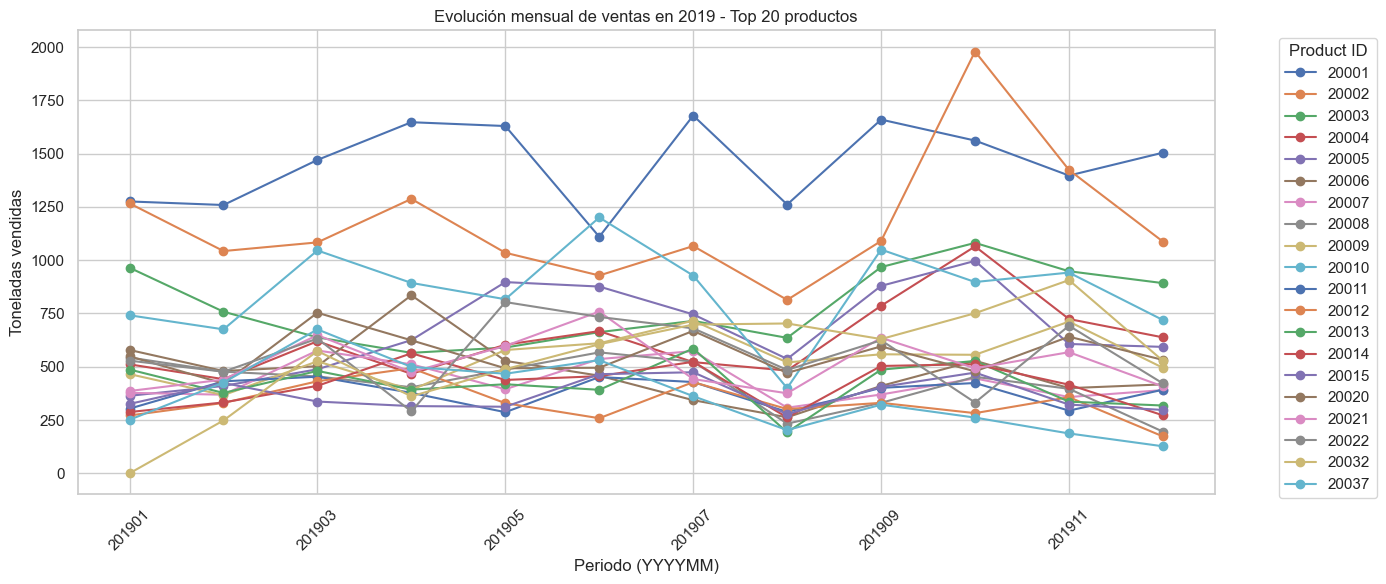

In [105]:
import matplotlib.pyplot as plt

# Asegurarse de que 'periodo' esté como string
df_validos["periodo"] = df_validos["periodo"].astype(str)

# Detectar el último año disponible
ultimo_anio = df_validos["periodo"].str[:4].astype(int).max()

# Filtrar registros del último año
df_ultimo_anio = df_validos[df_validos["periodo"].str.startswith(str(ultimo_anio))].copy()

# Calcular las ventas totales por producto
ventas_por_producto = df_ultimo_anio.groupby("product_id")["tn"].sum().sort_values(ascending=False)

# Seleccionar los 20 productos más vendidos
top_20_productos = ventas_por_producto.head(20).index

# Filtrar dataset para esos 20 productos
df_top20 = df_ultimo_anio[df_ultimo_anio["product_id"].isin(top_20_productos)]

# Agrupar por periodo y producto
df_mensual = df_top20.groupby(["periodo", "product_id"])["tn"].sum().reset_index()

# Pivot para graficar
df_pivot = df_mensual.pivot(index="periodo", columns="product_id", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 6))
df_pivot.plot(marker='o', figsize=(14, 6))
plt.title(f"Evolución mensual de ventas en {ultimo_anio} - Top 20 productos")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas vendidas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Product ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

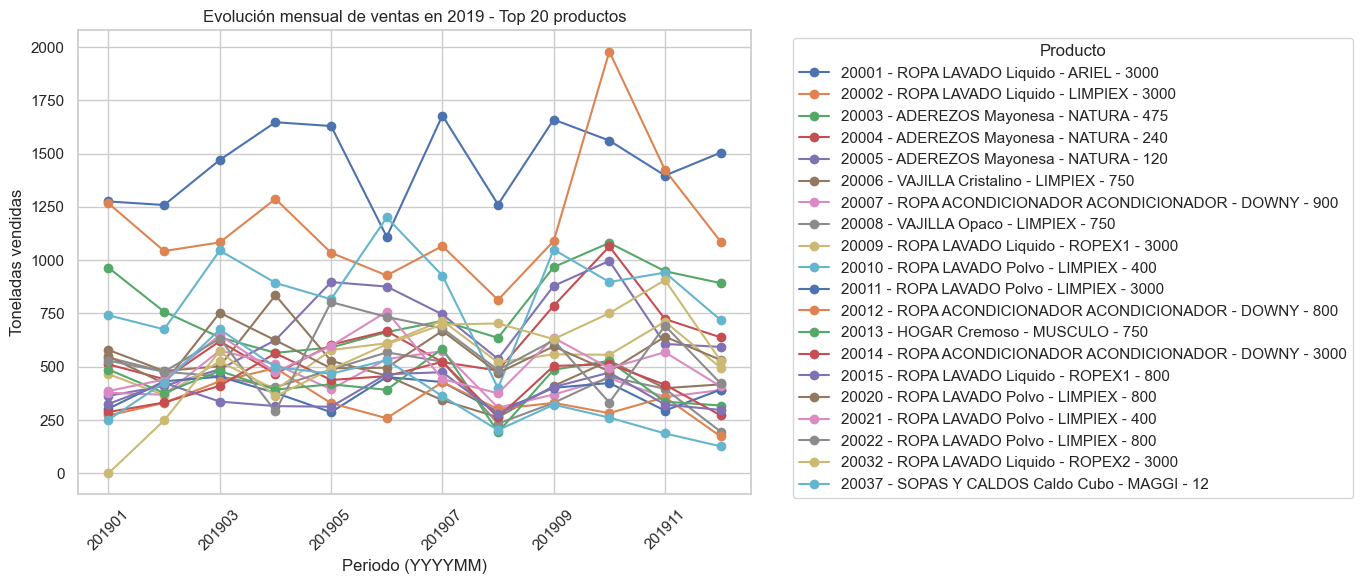

In [106]:
# Asegurarse de que todas las columnas sean strings y no tengan nulos
df_productos["product_id"] = df_productos["product_id"].astype(str)
df_productos["cat2"] = df_productos["cat2"].astype(str).fillna("")
df_productos["cat3"] = df_productos["cat3"].astype(str).fillna("")
df_productos["brand"] = df_productos["brand"].astype(str).fillna("")
df_productos["sku_size"] = df_productos["sku_size"].astype(str).fillna("")

# Crear la etiqueta
df_productos["etiqueta"] = (
    df_productos["product_id"] + " - " +
    df_productos["cat2"] + " " +
    df_productos["cat3"] + " - " +
    df_productos["brand"] + " - " +
    df_productos["sku_size"]
)
# Hacer merge con etiquetas al top 20
df_top20 = df_top20.merge(df_productos[["product_id", "etiqueta"]].drop_duplicates(), on="product_id", how="left")

# Usar la columna correcta de etiqueta después del merge
if "etiqueta_y" in df_top20.columns:
    df_top20["etiqueta"] = df_top20["etiqueta_y"]
elif "etiqueta_x" in df_top20.columns:
    df_top20["etiqueta"] = df_top20["etiqueta_x"]

# Agrupar por periodo y etiqueta
df_mensual = df_top20.groupby(["periodo", "etiqueta"])["tn"].sum().reset_index()

# Pivot para graficar
df_pivot = df_mensual.pivot(index="periodo", columns="etiqueta", values="tn").fillna(0)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df_pivot.plot(marker='o', figsize=(14, 6))
plt.title(f"Evolución mensual de ventas en {ultimo_anio} - Top 20 productos")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas vendidas")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [107]:
pip install dtale jupyter-dash

Note: you may need to restart the kernel to use updated packages.


In [108]:
import dtale

# Lanzar D-Tale sobre df_joined
d = dtale.show(df_joined)
d.open_browser()


In [109]:
# Convertir 'product_id' a string en ambos DataFrames
df_sellin["product_id"] = df_sellin["product_id"].astype(str).str.strip()
df_productos["product_id"] = df_productos["product_id"].astype(str).str.strip()

# Merge
df_joined = df_sellin.merge(df_productos, on="product_id", how="left")

# Filtrar registros con categoría no nula
df_joined = df_joined[df_joined["cat1"].notna()]


2025-05-27 21:16:33,965 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:33,965 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


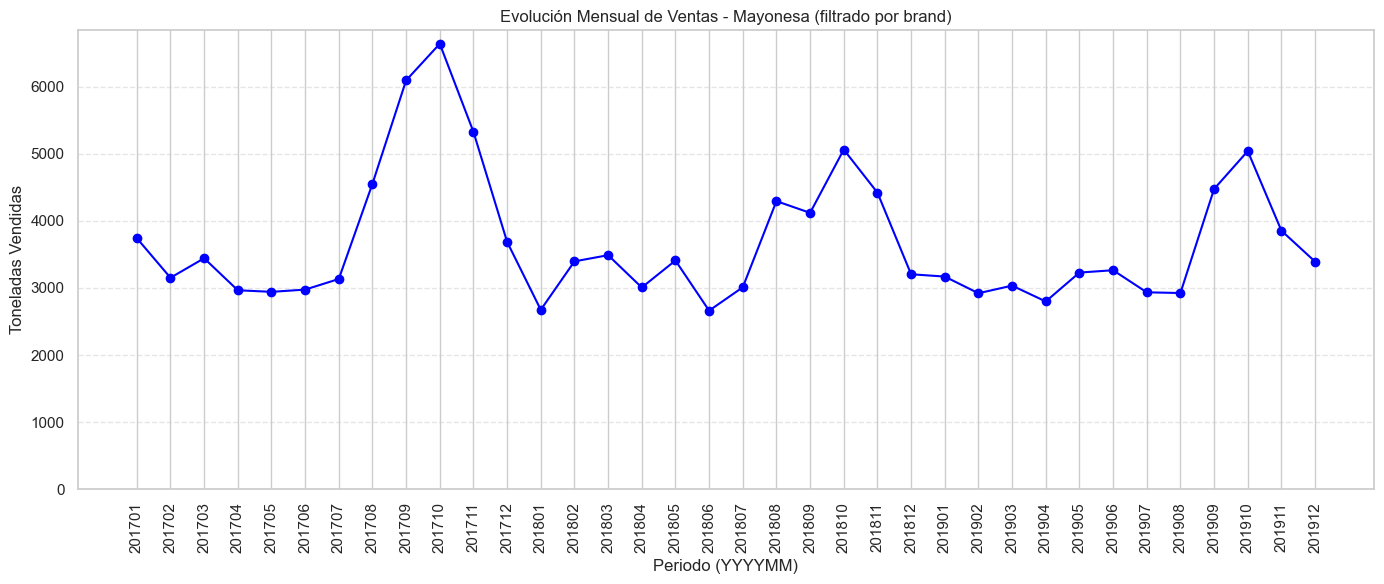

In [110]:
# Filtrar por registros donde 'brand' contenga la palabra 'mayonesa'
df_mayo = df_joined[df_joined["cat3"].str.contains("mayonesa", case=False, na=False)].copy()

# Asegurarse de que 'periodo' sea string
df_mayo["periodo"] = df_mayo["periodo"].astype(str)

# Agrupar por periodo y sumar toneladas
ventas_mayo = df_mayo.groupby("periodo")["tn"].sum().reset_index()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_mayo["periodo"], ventas_mayo["tn"], marker='o', color='blue')
plt.title("Evolución Mensual de Ventas - Mayonesa (filtrado por brand)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

2025-05-27 21:16:34,831 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:34,832 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


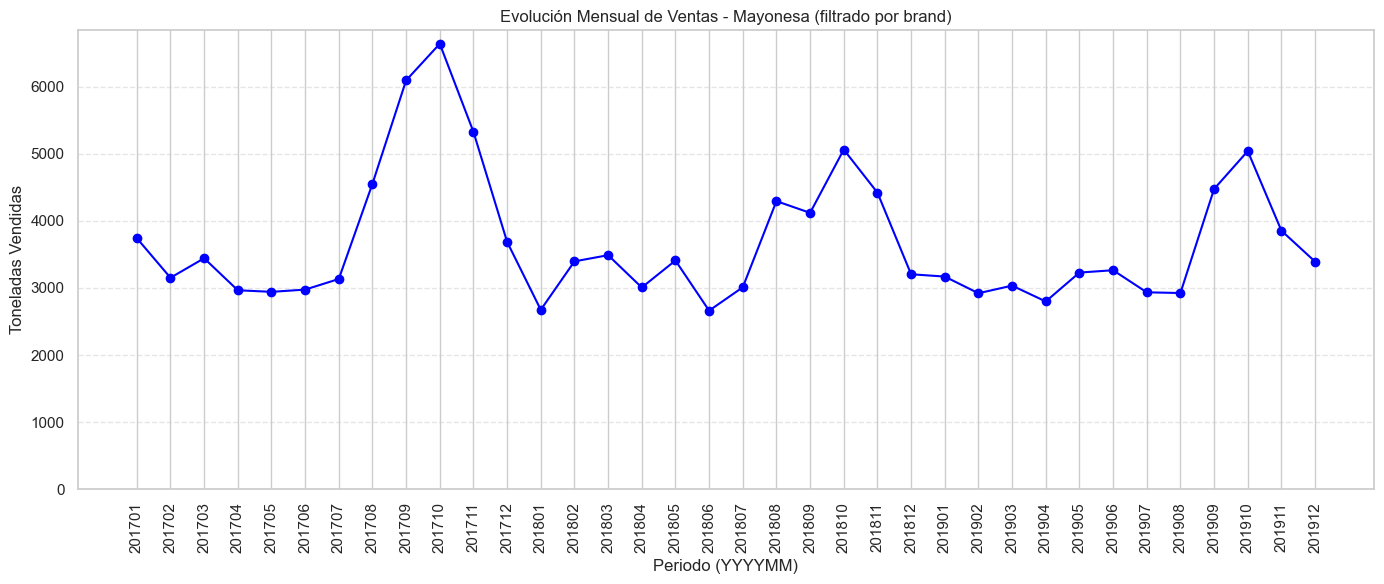

In [111]:
# Filtrar por registros donde 'brand' contenga la palabra 'mayonesa'
df_mayo = df_joined[df_joined["cat3"].str.contains("mayonesa", case=False, na=False)].copy()

# Asegurarse de que 'periodo' sea string
df_mayo["periodo"] = df_mayo["periodo"].astype(str)

# Agrupar por periodo y sumar toneladas
ventas_mayo = df_mayo.groupby("periodo")["tn"].sum().reset_index()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_mayo["periodo"], ventas_mayo["tn"], marker='o', color='blue')
plt.title("Evolución Mensual de Ventas - Mayonesa (filtrado por brand)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

2025-05-27 21:16:35,705 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:35,706 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:35,706 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:35,706 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


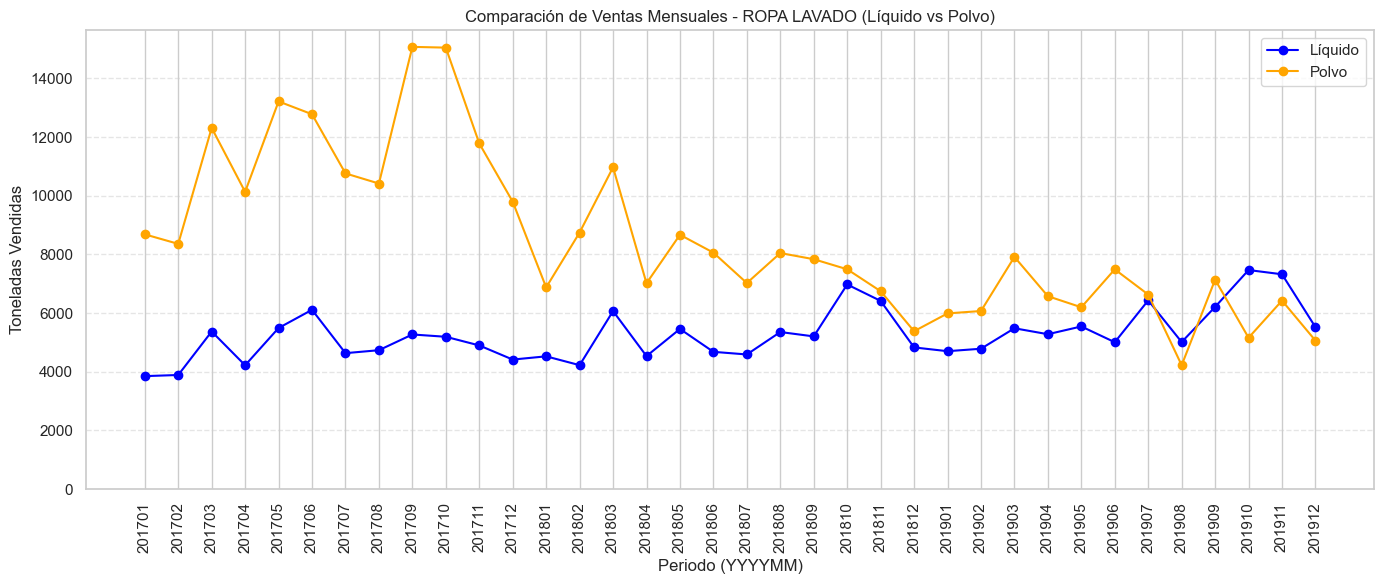

In [112]:


# Filtrar por ROPA LAVADO
df_ropa = df_joined[df_joined["cat2"].astype(str).str.upper() == "ROPA LAVADO"].copy()

# Separar en líquido y polvo
df_liquido = df_ropa[df_ropa["cat3"].astype(str).str.lower() == "liquido"].copy()
df_polvo = df_ropa[df_ropa["cat3"].astype(str).str.lower() == "polvo"].copy()

# Asegurar tipo string en periodo
df_liquido["periodo"] = df_liquido["periodo"].astype(str)
df_polvo["periodo"] = df_polvo["periodo"].astype(str)

# Agrupar y sumar toneladas
ventas_liquido = df_liquido.groupby("periodo")["tn"].sum().reset_index()
ventas_polvo = df_polvo.groupby("periodo")["tn"].sum().reset_index()

# Crear columna x como índice numérico para cada DataFrame
ventas_liquido = ventas_liquido.copy()
ventas_polvo = ventas_polvo.copy()
ventas_liquido["x"] = np.arange(len(ventas_liquido))
ventas_polvo["x"] = np.arange(len(ventas_polvo))

# Ajustar línea de tendencia (grado 1)
tend_liq = np.poly1d(np.polyfit(ventas_liquido["x"], ventas_liquido["tn"], 1))
tend_pol = np.poly1d(np.polyfit(ventas_polvo["x"], ventas_polvo["tn"], 1))

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_liquido["periodo"], ventas_liquido["tn"], marker='o', label="Líquido", color='blue')
plt.plot(ventas_polvo["periodo"], ventas_polvo["tn"], marker='o', label="Polvo", color='orange')
plt.title("Comparación de Ventas Mensuales - ROPA LAVADO (Líquido vs Polvo)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


2025-05-27 21:16:36,091 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,092 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,093 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,093 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,094 - INFO     - Using categorical units to plot a list of strings that 

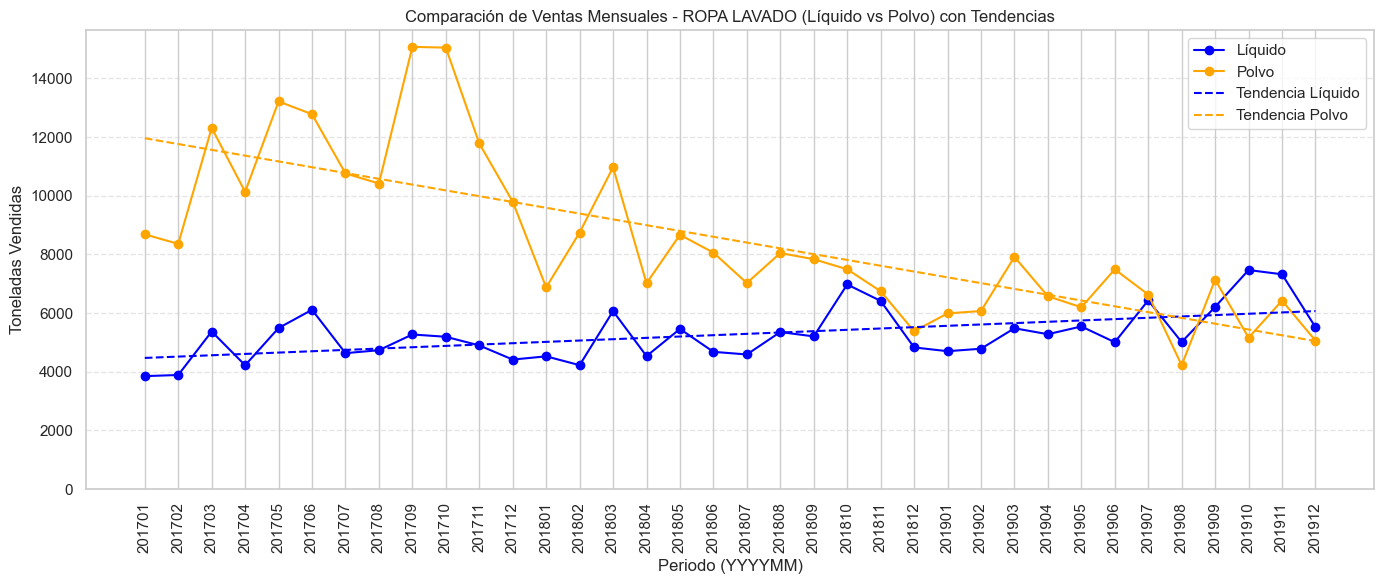

In [113]:
# Crear columna x como índice numérico para cada DataFrame
ventas_liquido = ventas_liquido.copy()
ventas_polvo = ventas_polvo.copy()
ventas_liquido["x"] = np.arange(len(ventas_liquido))
ventas_polvo["x"] = np.arange(len(ventas_polvo))

# Ajustar línea de tendencia (grado 1) sobre toneladas vendidas ("tn")
tend_liq = np.poly1d(np.polyfit(ventas_liquido["x"], ventas_liquido["tn"], 1))
tend_pol = np.poly1d(np.polyfit(ventas_polvo["x"], ventas_polvo["tn"], 1))

# Graficar
plt.figure(figsize=(14, 6))

# Líneas reales
plt.plot(ventas_liquido["periodo"], ventas_liquido["tn"], marker='o', label="Líquido", color='blue')
plt.plot(ventas_polvo["periodo"], ventas_polvo["tn"], marker='o', label="Polvo", color='orange')

# Líneas de tendencia
plt.plot(ventas_liquido["periodo"], tend_liq(ventas_liquido["x"]), linestyle='--', color='blue', label="Tendencia Líquido")
plt.plot(ventas_polvo["periodo"], tend_pol(ventas_polvo["x"]), linestyle='--', color='orange', label="Tendencia Polvo")

# Estética
plt.title("Comparación de Ventas Mensuales - ROPA LAVADO (Líquido vs Polvo) con Tendencias")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

2025-05-27 21:16:36,483 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,484 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,494 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


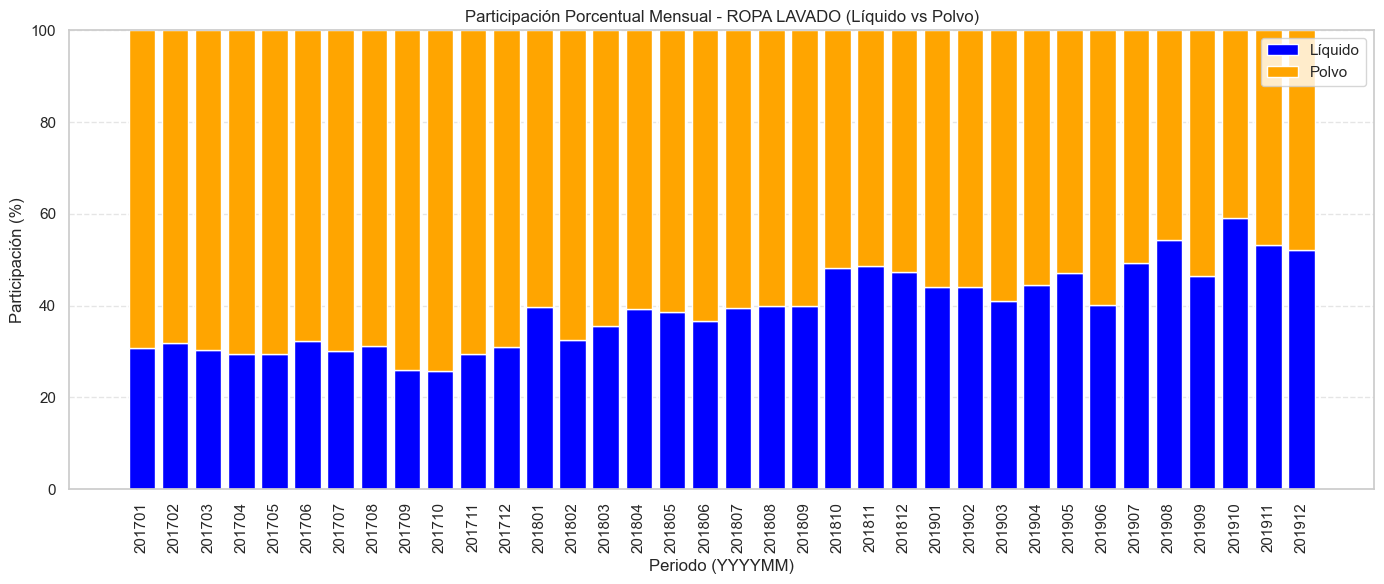

In [114]:


# Unificar ambos en un solo DataFrame por periodo
df_participacion = pd.merge(
    ventas_liquido.rename(columns={"tn": "liquido"}),
    ventas_polvo.rename(columns={"tn": "polvo"}),
    on="periodo", how="outer"
).fillna(0)

# Calcular porcentaje
df_participacion["total"] = df_participacion["liquido"] + df_participacion["polvo"]
df_participacion["%_liquido"] = df_participacion["liquido"] / df_participacion["total"] * 100
df_participacion["%_polvo"] = df_participacion["polvo"] / df_participacion["total"] * 100

# Gráfico de barras apiladas por porcentaje
plt.figure(figsize=(14, 6))
plt.bar(df_participacion["periodo"], df_participacion["%_liquido"], label="Líquido", color="blue")
plt.bar(df_participacion["periodo"], df_participacion["%_polvo"], bottom=df_participacion["%_liquido"], label="Polvo", color="orange")
plt.title("Participación Porcentual Mensual - ROPA LAVADO (Líquido vs Polvo)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Participación (%)")
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2025-05-27 21:16:36,919 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,920 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,921 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,921 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:36,922 - INFO     - Using categorical units to plot a list of strings that 

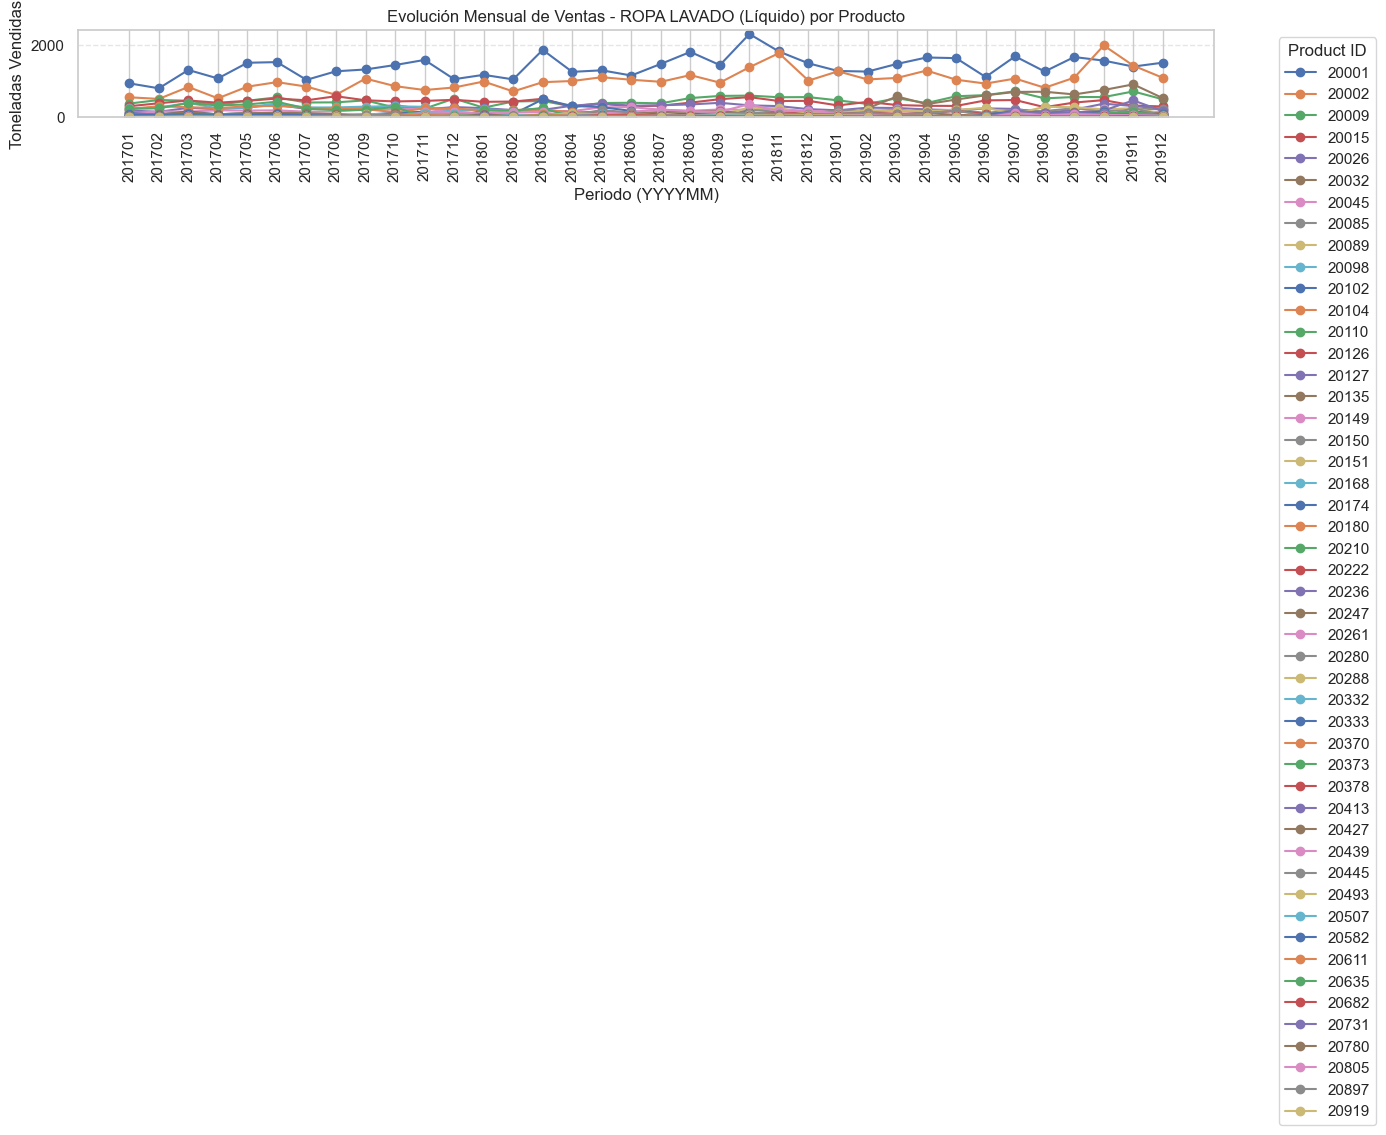

In [115]:
# Agrupar por periodo y producto
ventas_por_producto = df_liquido.groupby(["periodo", "product_id"])["tn"].sum().reset_index()

# Pivot para una línea por producto
df_evolucion = ventas_por_producto.pivot(index="periodo", columns="product_id", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    plt.plot(df_evolucion.index, df_evolucion[col], marker='o', label=col)

plt.title("Evolución Mensual de Ventas - ROPA LAVADO (Líquido) por Producto")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Product ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2025-05-27 21:16:37,573 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:37,574 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:37,574 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:37,575 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:37,575 - INFO     - Using categorical units to plot a list of strings that 

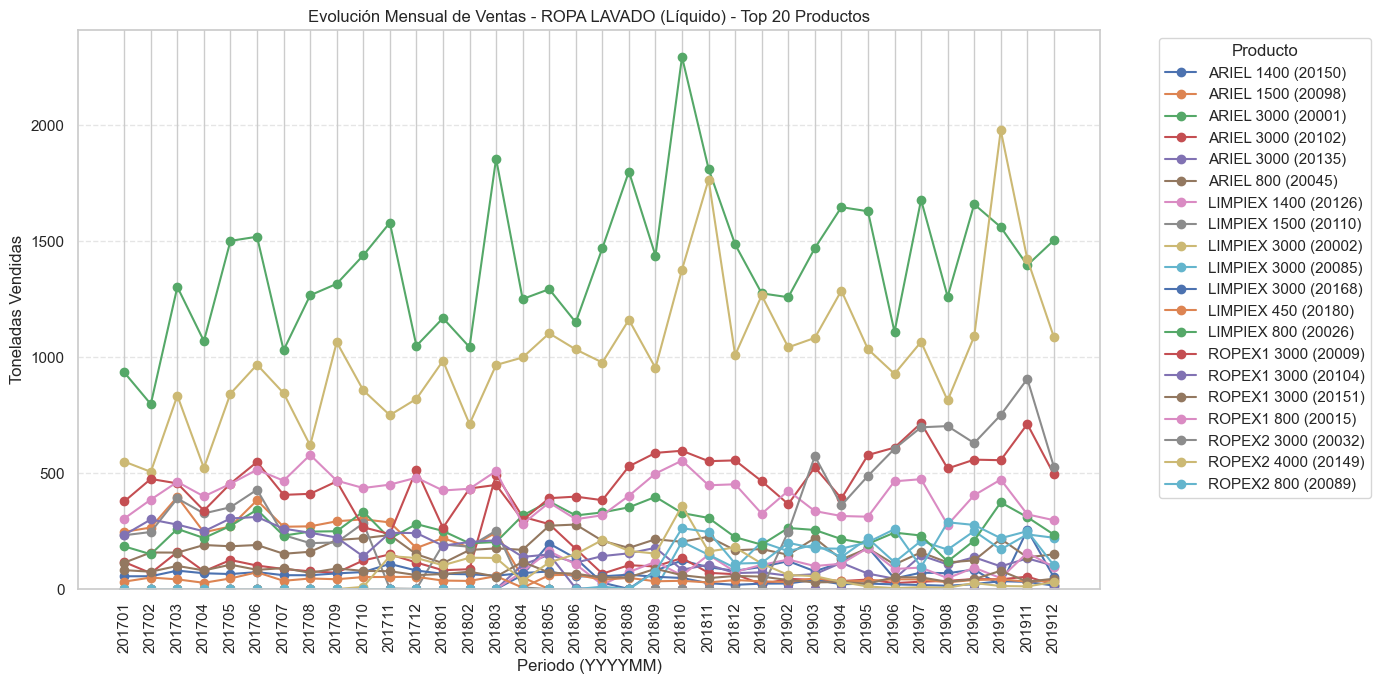

In [116]:


# Crear columna descriptiva en df_productos
df_productos["etiqueta"] = (
    df_productos["brand"].astype(str).fillna("") + " " +
    df_productos["sku_size"].astype(str).fillna("") +
    " (" + df_productos["product_id"] + ")"
)

# Merge con solo las columnas necesarias
df_liquido = df_liquido.merge(df_productos[["product_id", "etiqueta"]].drop_duplicates(), on="product_id", how="left")

# Si existen columnas 'etiqueta_x' y 'etiqueta_y' por múltiples merges, usa la correcta
if "etiqueta_y" in df_liquido.columns:
    df_liquido["etiqueta"] = df_liquido["etiqueta_y"]
elif "etiqueta_x" in df_liquido.columns:
    df_liquido["etiqueta"] = df_liquido["etiqueta_x"]

# Agrupar por periodo y producto
ventas_por_producto = df_liquido.groupby(["periodo", "product_id", "etiqueta"])["tn"].sum().reset_index()

# Calcular top 20 productos por ventas totales
top_20_ids = (
    ventas_por_producto.groupby("product_id")["tn"].sum()
    .sort_values(ascending=False).head(20).index
)

# Filtrar solo los top 20
ventas_top20 = ventas_por_producto[ventas_por_producto["product_id"].isin(top_20_ids)]

# Usar 'etiqueta' como columna en pivot
df_evolucion = ventas_top20.pivot(index="periodo", columns="etiqueta", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    plt.plot(df_evolucion.index, df_evolucion[col], marker='o', label=col)

plt.title("Evolución Mensual de Ventas - ROPA LAVADO (Líquido) - Top 20 Productos")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:38,077 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,078 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,078 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,079 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,079 - INFO     - Using categorical units to plot a list of strings that 

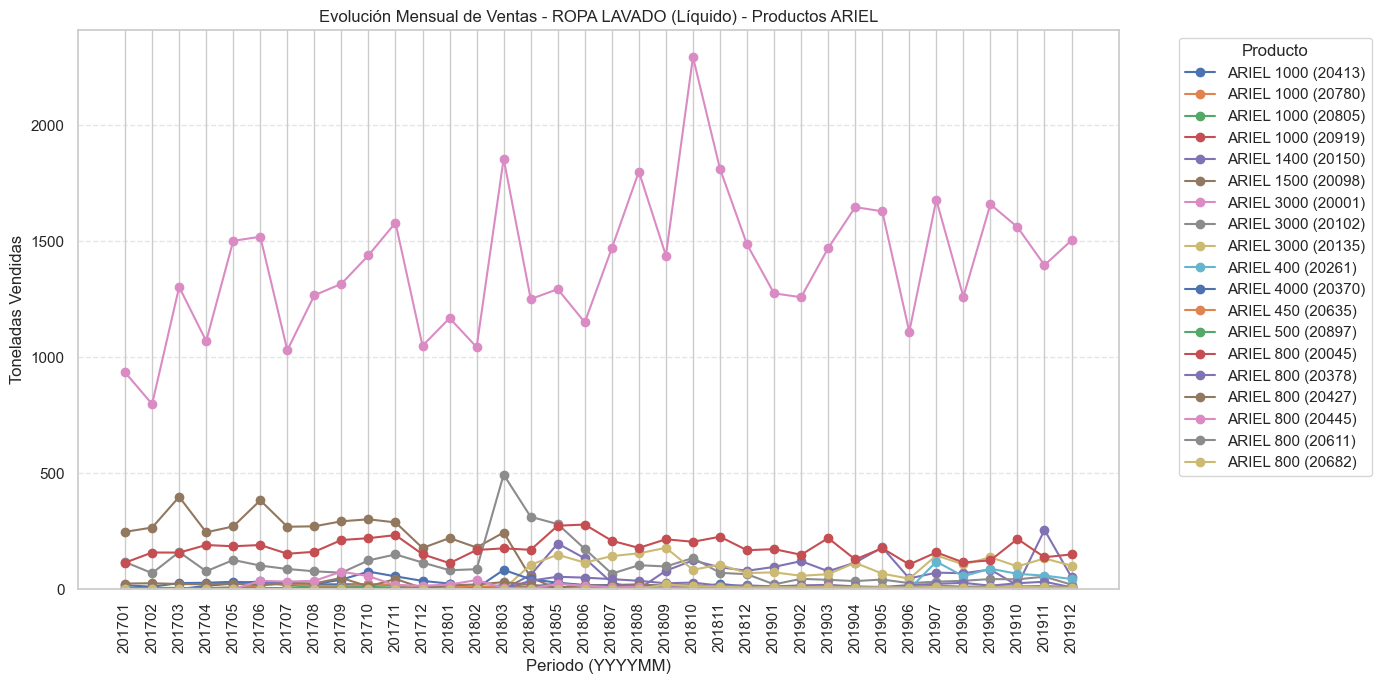

In [117]:

# Crear columna descriptiva en df_productos
df_productos["etiqueta"] = (
    df_productos["brand"].astype(str).fillna("") + " " +
    df_productos["sku_size"].astype(str).fillna("") +
    " (" + df_productos["product_id"] + ")"
)

# Filtrar solo productos ARIEL
productos_ariel = df_productos[df_productos["brand"].str.upper() == "ARIEL"][["product_id", "etiqueta"]]

# Eliminar la columna 'etiqueta' de df_liquido antes del merge para evitar conflicto
df_liquido_sin_etiqueta = df_liquido.drop(columns=["etiqueta"], errors="ignore")

# Hacer merge con df_liquido para quedarnos solo con ARIEL
df_liquido_ariel = df_liquido_sin_etiqueta.merge(productos_ariel, on="product_id", how="inner")

# Agrupar por periodo y producto
ventas_ariel = df_liquido_ariel.groupby(["periodo", "etiqueta"])["tn"].sum().reset_index()

# Pivot para una línea por producto
df_evolucion = ventas_ariel.pivot(index="periodo", columns="etiqueta", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    plt.plot(df_evolucion.index, df_evolucion[col], marker='o', label=col)

plt.title("Evolución Mensual de Ventas - ROPA LAVADO (Líquido) - Productos ARIEL")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:38,548 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,549 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,549 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,550 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,550 - INFO     - Using categorical units to plot a list of strings that 

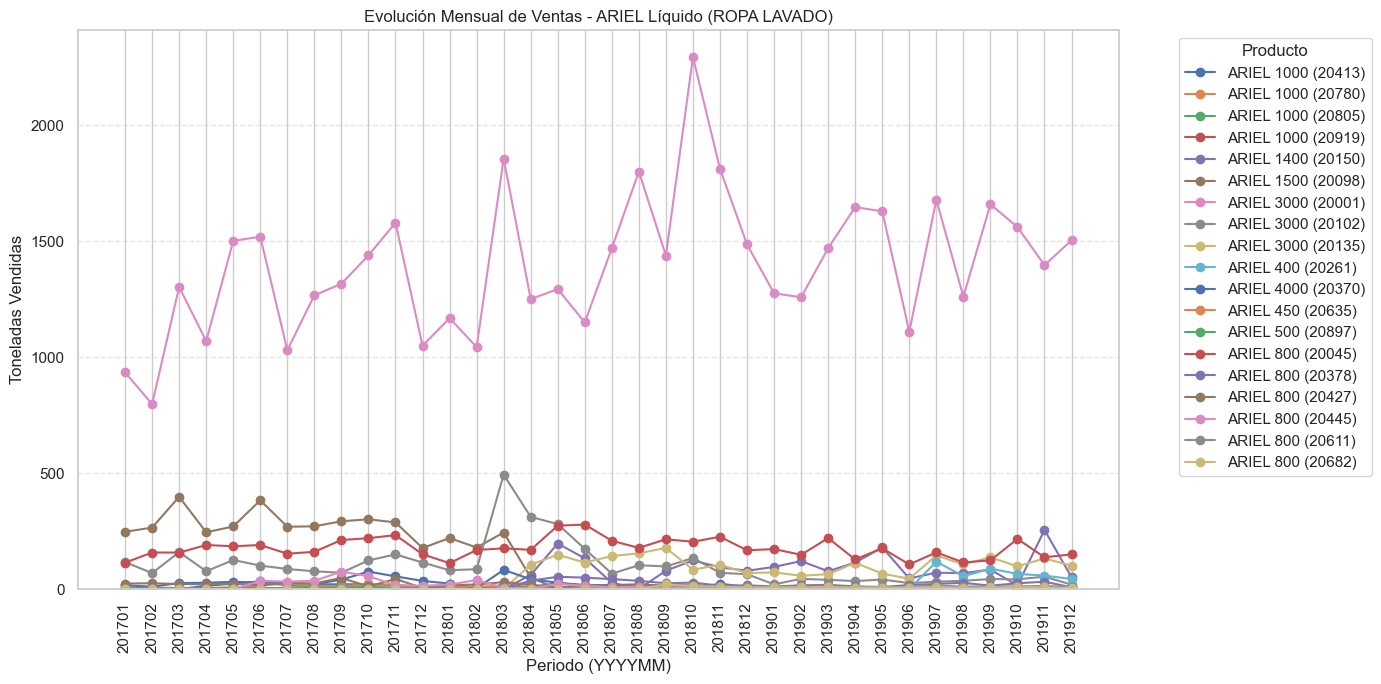

In [118]:

# Crear columna descriptiva en df_productos
df_productos["etiqueta"] = (
    df_productos["brand"].astype(str).fillna("") + " " +
    df_productos["sku_size"].astype(str).fillna("") +
    " (" + df_productos["product_id"] + ")"
)

# Filtrar productos ARIEL líquidos
productos_ariel_liquido = df_productos[
    (df_productos["brand"].str.upper() == "ARIEL") &
    (df_productos["cat3"].str.lower() == "liquido")
][["product_id", "etiqueta"]]

# Eliminar la columna 'etiqueta' de df_liquido antes del merge para evitar conflicto
df_liquido_sin_etiqueta = df_liquido.drop(columns=["etiqueta"], errors="ignore")

# Filtrar df_liquido solo con productos Ariel líquidos
df_liquido_ariel = df_liquido_sin_etiqueta.merge(productos_ariel_liquido, on="product_id", how="inner")

# Asegurar que 'periodo' sea string
df_liquido_ariel["periodo"] = df_liquido_ariel["periodo"].astype(str)

# Agrupar por periodo y producto
ventas_ariel = df_liquido_ariel.groupby(["periodo", "etiqueta"])["tn"].sum().reset_index()

# Pivot para una línea por producto
df_evolucion = ventas_ariel.pivot(index="periodo", columns="etiqueta", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    plt.plot(df_evolucion.index, df_evolucion[col], marker='o', label=col)

plt.title("Evolución Mensual de Ventas - ARIEL Líquido (ROPA LAVADO)")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:38,970 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,971 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,971 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,972 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:38,972 - INFO     - Using categorical units to plot a list of strings that 

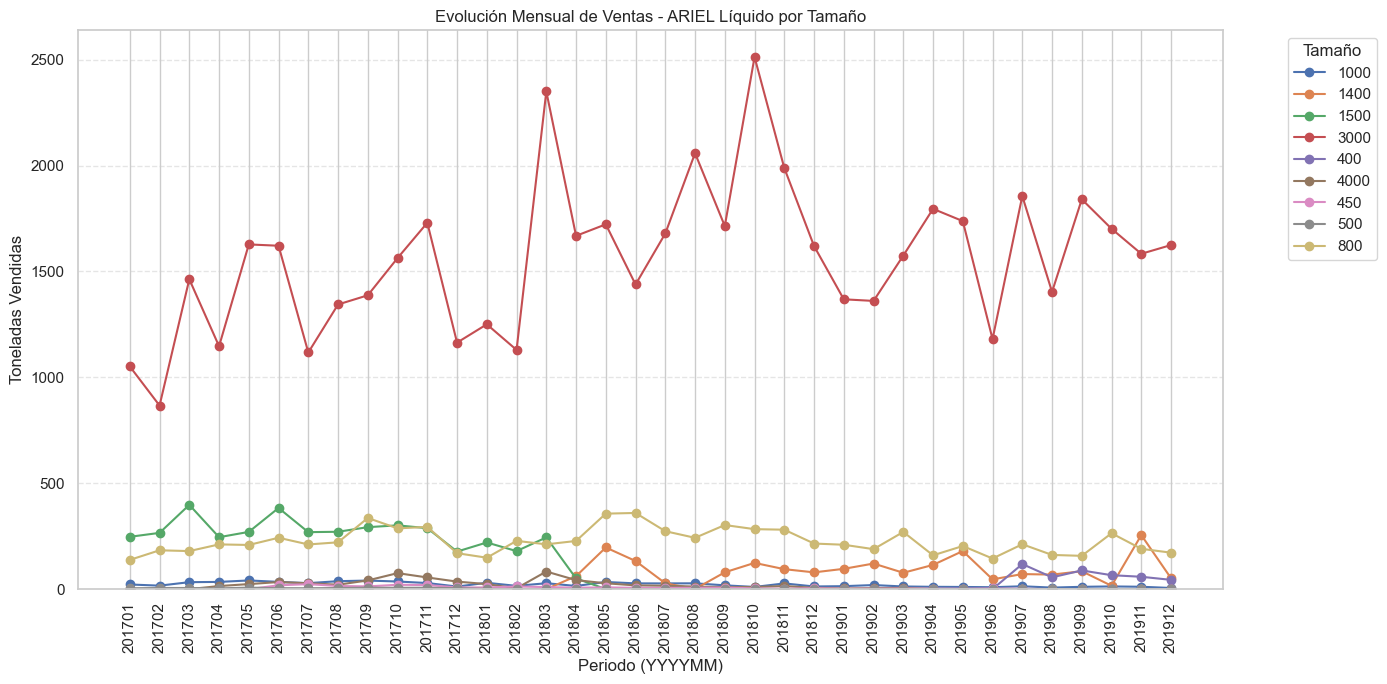

In [119]:

# Asegurar que 'sku_size' es string en ambos DataFrames antes del merge
df_liquido["sku_size"] = df_liquido["sku_size"].astype(str).str.strip()
productos_ariel_liquido = df_productos[
    (df_productos["brand"].str.upper() == "ARIEL") &
    (df_productos["cat3"].str.lower() == "liquido")
][["product_id", "sku_size"]]
productos_ariel_liquido["sku_size"] = productos_ariel_liquido["sku_size"].astype(str).str.strip()

# Merge con df_liquido para agregar sku_size
df_liquido_ariel = df_liquido.merge(productos_ariel_liquido, on=["product_id", "sku_size"], how="inner")

# Asegurar que periodo es string
df_liquido_ariel["periodo"] = df_liquido_ariel["periodo"].astype(str)

# Agrupar por periodo y sku_size (toneladas por presentación)
ventas_ariel_sku = df_liquido_ariel.groupby(["periodo", "sku_size"])["tn"].sum().reset_index()

# Pivot para graficar una línea por tamaño
df_evolucion = ventas_ariel_sku.pivot(index="periodo", columns="sku_size", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    plt.plot(df_evolucion.index, df_evolucion[col], marker='o', label=col)

plt.title("Evolución Mensual de Ventas - ARIEL Líquido por Tamaño")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Tamaño", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:39,438 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,439 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,440 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,440 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


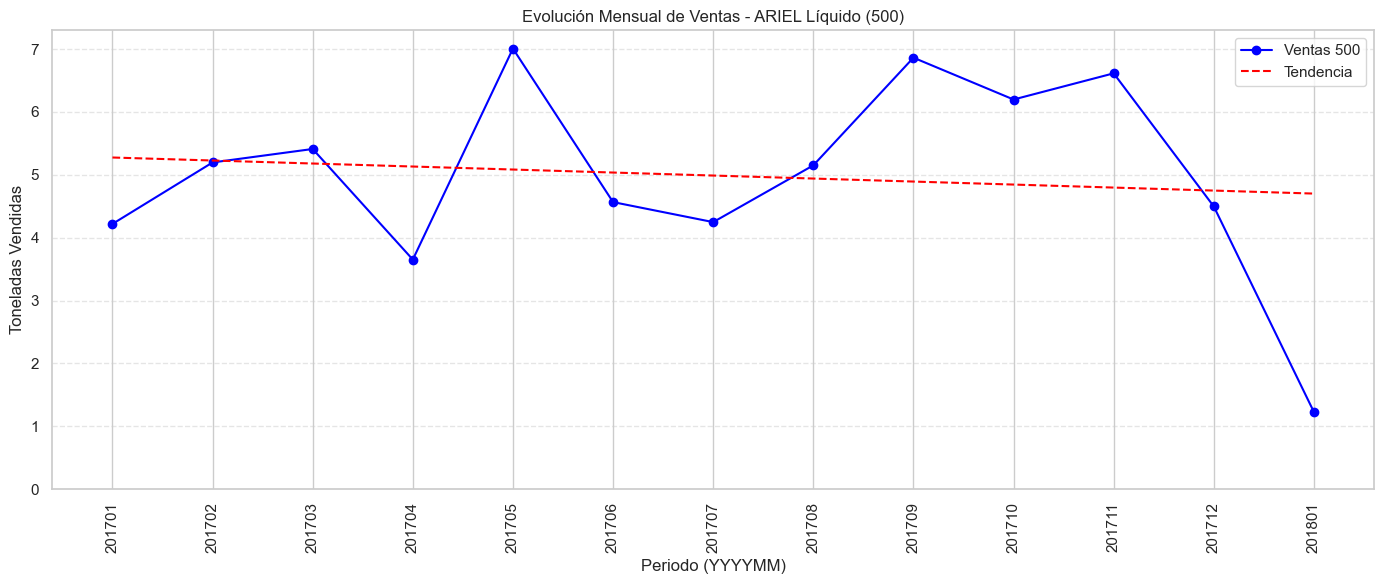

In [120]:

# -------------------------------
# 🔽 Parámetro de filtro por tamaño
sku_filtro = "500"  # <-- Cambiar por el tamaño deseado
# -------------------------------

# Asegurar que 'sku_size' es string en ambos DataFrames antes del merge
df_liquido["sku_size"] = df_liquido["sku_size"].astype(str).str.strip()
df_productos["sku_size"] = df_productos["sku_size"].astype(str).str.strip()

productos_ariel_liquido = df_productos[
    (df_productos["brand"].str.upper() == "ARIEL") &
    (df_productos["cat3"].str.lower() == "liquido")
][["product_id", "sku_size"]]

# Merge con df_liquido para agregar sku_size
df_liquido_ariel = df_liquido.merge(productos_ariel_liquido, on=["product_id", "sku_size"], how="inner")

# Asegurar que periodo es string
df_liquido_ariel["periodo"] = df_liquido_ariel["periodo"].astype(str)

# Agrupar por periodo y sku_size
ventas_ariel_sku = df_liquido_ariel.groupby(["periodo", "sku_size"])["tn"].sum().reset_index()

# Filtrar solo por el sku deseado
ventas_filtradas = ventas_ariel_sku[ventas_ariel_sku["sku_size"] == sku_filtro].copy()

# Eje X para tendencia
ventas_filtradas["x"] = np.arange(len(ventas_filtradas))

# Línea de tendencia (grado 1)
z = np.polyfit(ventas_filtradas["x"], ventas_filtradas["tn"], 1)
tendencia = np.poly1d(z)

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_filtradas["periodo"], ventas_filtradas["tn"], marker='o', label=f"Ventas {sku_filtro}", color='blue')
plt.plot(ventas_filtradas["periodo"], tendencia(ventas_filtradas["x"]), linestyle='--', color='red', label="Tendencia")

plt.title(f"Evolución Mensual de Ventas - ARIEL Líquido ({sku_filtro})")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


2025-05-27 21:16:39,839 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,840 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,840 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,841 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:39,841 - INFO     - Using categorical units to plot a list of strings that 

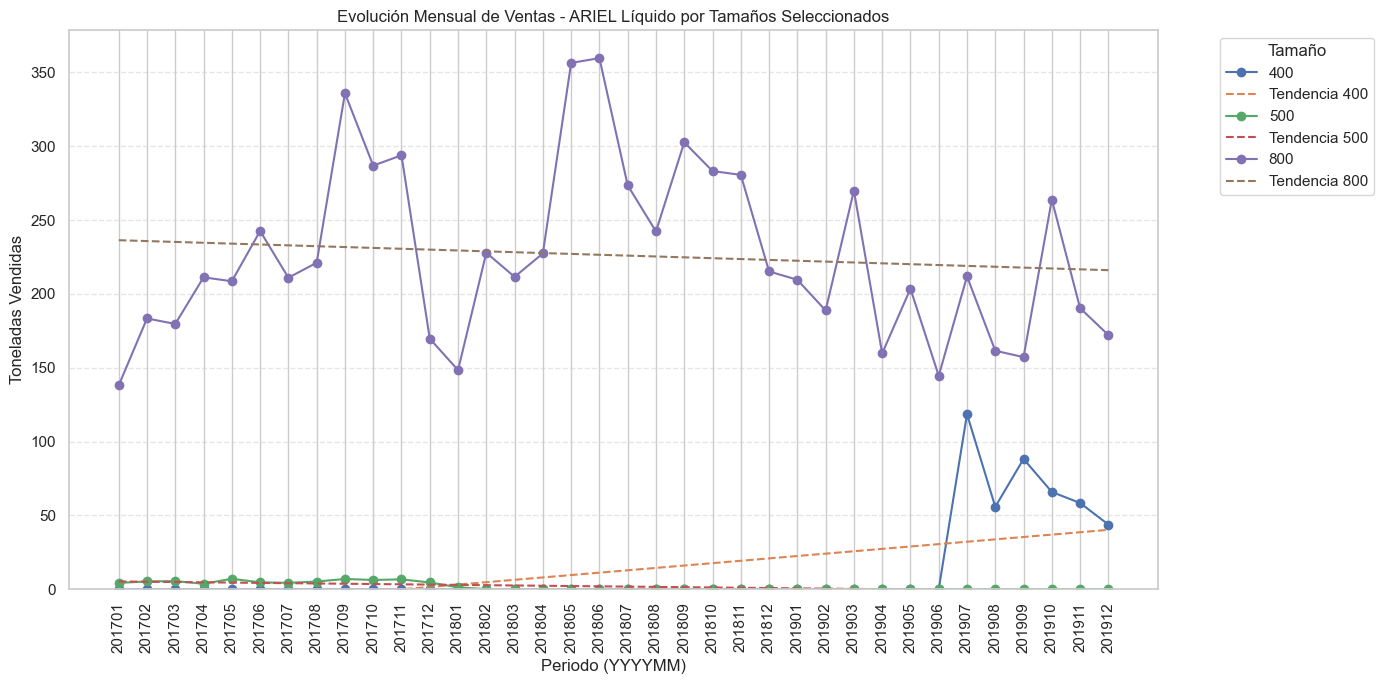

In [121]:

# -------------------------------
# 🔽 Parámetro de filtro por lista de tamaños
sku_filtro = ["400","800", "500"]  # Puedes modificar esta lista
# -------------------------------

# Asegurar que 'sku_size' es string en ambos DataFrames
df_liquido["sku_size"] = df_liquido["sku_size"].astype(str).str.strip()
df_productos["sku_size"] = df_productos["sku_size"].astype(str).str.strip()

# Filtrar productos Ariel líquidos
productos_ariel_liquido = df_productos[
    (df_productos["brand"].str.upper() == "ARIEL") &
    (df_productos["cat3"].str.lower() == "liquido")
][["product_id", "sku_size"]]

# Merge
df_liquido_ariel = df_liquido.merge(productos_ariel_liquido, on=["product_id", "sku_size"], how="inner")

# Asegurar que periodo es string
df_liquido_ariel["periodo"] = df_liquido_ariel["periodo"].astype(str)

# Agrupar por periodo y sku_size
ventas_ariel_sku = df_liquido_ariel.groupby(["periodo", "sku_size"])["tn"].sum().reset_index()

# Filtrar solo los sku deseados
ventas_filtradas = ventas_ariel_sku[ventas_ariel_sku["sku_size"].isin(sku_filtro)].copy()

# Pivot para una línea por tamaño
df_evolucion = ventas_filtradas.pivot(index="periodo", columns="sku_size", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for i, col in enumerate(df_evolucion.columns):
    x_vals = np.arange(len(df_evolucion))
    y_vals = df_evolucion[col].values
    plt.plot(df_evolucion.index, y_vals, marker='o', label=col)
    
    # Agregar tendencia por tamaño
    if len(x_vals) > 1 and y_vals.sum() > 0:
        coef = np.polyfit(x_vals, y_vals, 1)
        tendencia = np.poly1d(coef)
        plt.plot(df_evolucion.index, tendencia(x_vals), linestyle="--", label=f"Tendencia {col}")

# Estética
plt.title("Evolución Mensual de Ventas - ARIEL Líquido por Tamaños Seleccionados")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Tamaño", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:40,370 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,371 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,371 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,372 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


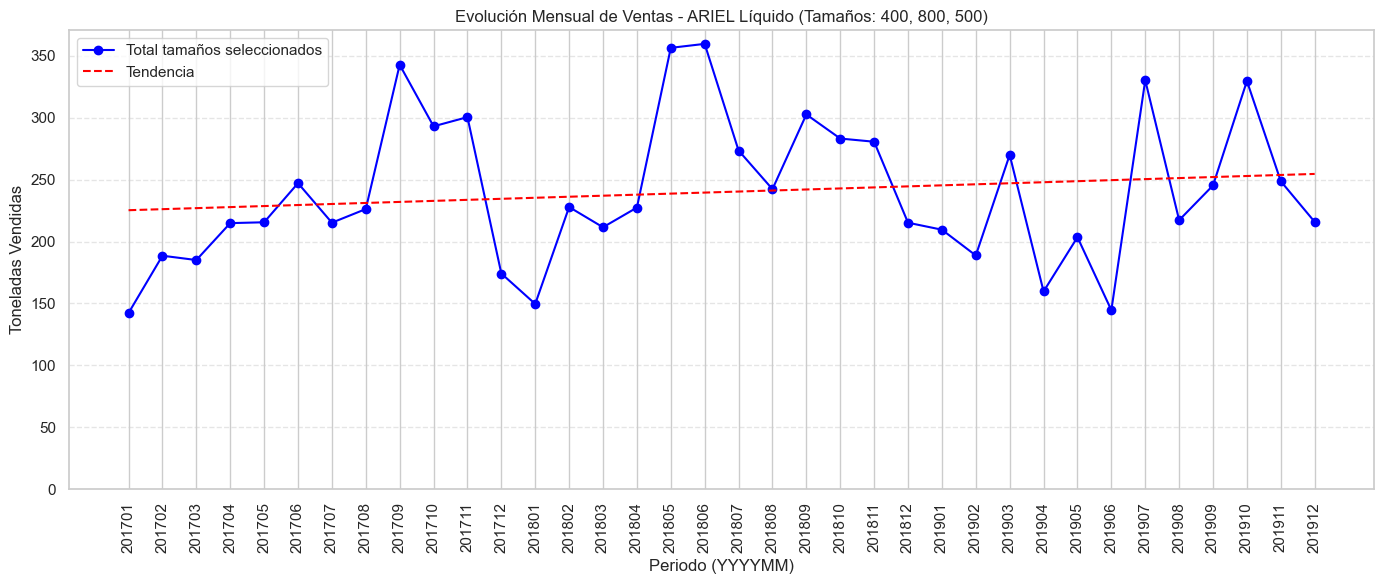

In [122]:

# -------------------------------
# 🔽 Parámetro: lista de tamaños a agrupar como una sola categoría
sku_filtro = ["400", "800", "500"]
# -------------------------------

# Asegurar que 'sku_size' es string en ambos DataFrames
df_liquido["sku_size"] = df_liquido["sku_size"].astype(str).str.strip()
df_productos["sku_size"] = df_productos["sku_size"].astype(str).str.strip()

# Filtrar productos Ariel líquidos
productos_ariel_liquido = df_productos[
    (df_productos["brand"].str.upper() == "ARIEL") &
    (df_productos["cat3"].str.lower() == "liquido")
][["product_id", "sku_size"]]

# Merge
df_liquido_ariel = df_liquido.merge(productos_ariel_liquido, on=["product_id", "sku_size"], how="inner")

# Asegurar que 'periodo' es string
df_liquido_ariel["periodo"] = df_liquido_ariel["periodo"].astype(str)

# Filtrar solo los sku deseados
df_filtrado = df_liquido_ariel[df_liquido_ariel["sku_size"].isin(sku_filtro)].copy()

# Agrupar por periodo (sumando todos los tamaños seleccionados como una sola serie)
ventas_total = df_filtrado.groupby("periodo")["tn"].sum().reset_index()

# Eje X para tendencia
ventas_total["x"] = np.arange(len(ventas_total))

# Ajuste de tendencia (recta)
z = np.polyfit(ventas_total["x"], ventas_total["tn"], 1)
tendencia = np.poly1d(z)

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(ventas_total["periodo"], ventas_total["tn"], marker='o', color='blue', label="Total tamaños seleccionados")
plt.plot(ventas_total["periodo"], tendencia(ventas_total["x"]), linestyle='--', color='red', label="Tendencia")

# Estética
plt.title(f"Evolución Mensual de Ventas - ARIEL Líquido (Tamaños: {', '.join(sku_filtro)})")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


2025-05-27 21:16:40,845 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,846 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,846 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,847 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:40,847 - INFO     - Using categorical units to plot a list of strings that 

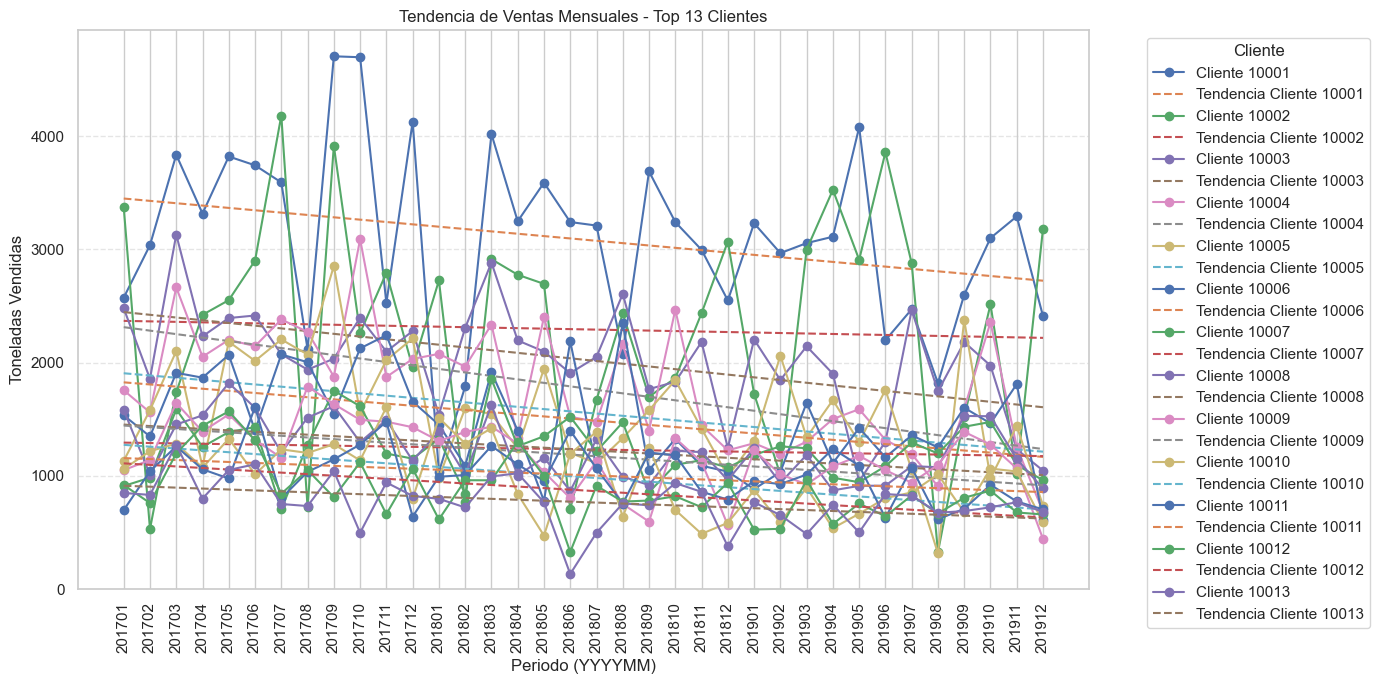

In [123]:


# Obtener los 13 clientes con más volumen total
top_clientes = df_joined.groupby("customer_id")["tn"].sum().sort_values(ascending=False).head(13).index.tolist()

# Filtrar el dataset para esos clientes
df_top_clientes = df_joined[df_joined["customer_id"].isin(top_clientes)].copy()

# Asegurar que periodo sea string
df_top_clientes["periodo"] = df_top_clientes["periodo"].astype(str)

# Agrupar por periodo y cliente
ventas_clientes = df_top_clientes.groupby(["periodo", "customer_id"])["tn"].sum().reset_index()

# Pivot para tener una serie por cliente
df_evolucion = ventas_clientes.pivot(index="periodo", columns="customer_id", values="tn").fillna(0)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_evolucion.columns:
    x_vals = np.arange(len(df_evolucion))
    y_vals = df_evolucion[col].values
    plt.plot(df_evolucion.index, y_vals, marker='o', label=f"Cliente {col}")

    # Línea de tendencia
    if len(x_vals) > 1 and y_vals.sum() > 0:
        z = np.polyfit(x_vals, y_vals, 1)
        tendencia = np.poly1d(z)
        plt.plot(df_evolucion.index, tendencia(x_vals), linestyle='--', label=f"Tendencia Cliente {col}")

# Estética
plt.title("Tendencia de Ventas Mensuales - Top 13 Clientes")
plt.xlabel("Periodo (YYYYMM)")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=90)
plt.ylim(bottom=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Cliente", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2025-05-27 21:16:41,848 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:41,848 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:41,849 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:41,849 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


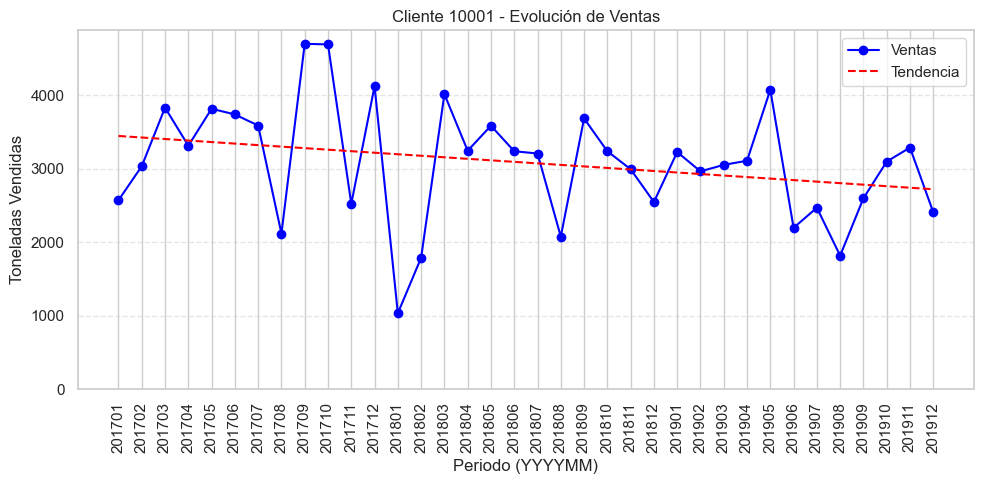

2025-05-27 21:16:42,001 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,001 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,002 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,002 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


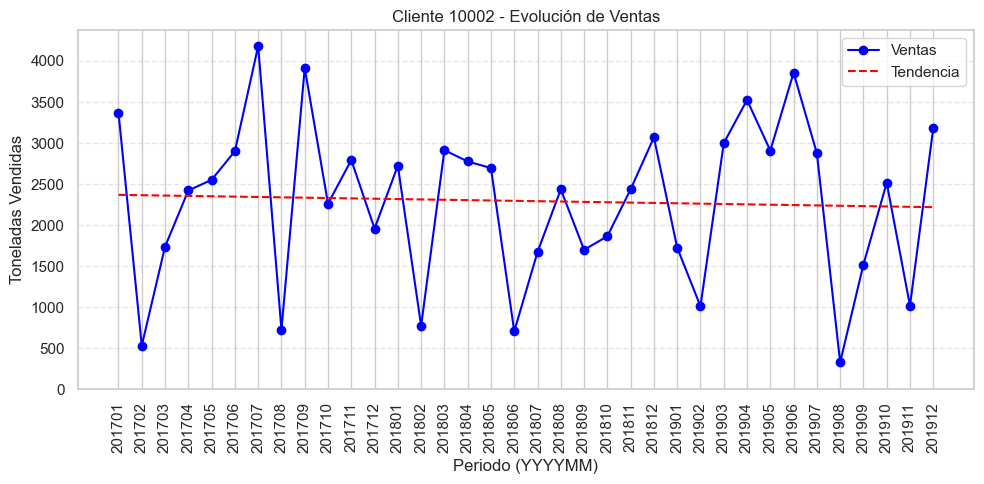

2025-05-27 21:16:42,165 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,166 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,166 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,166 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


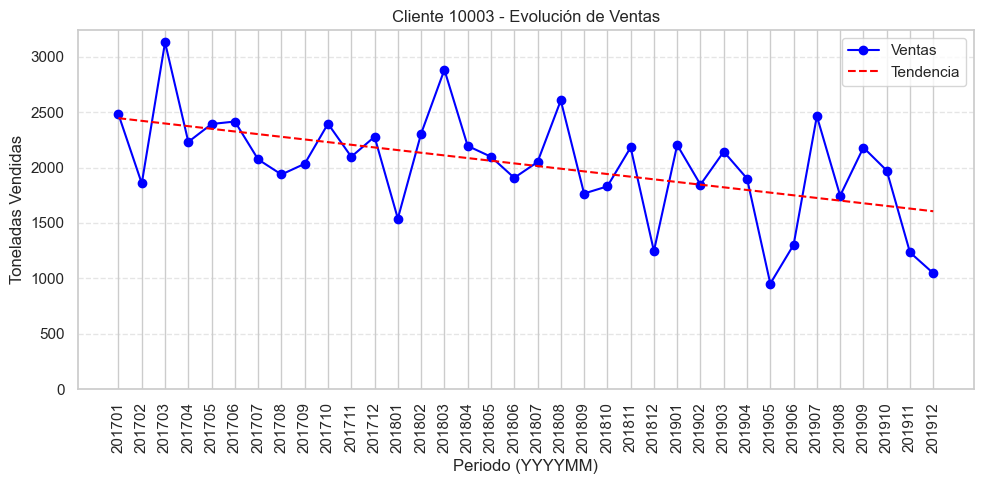

2025-05-27 21:16:42,324 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,324 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,325 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,325 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


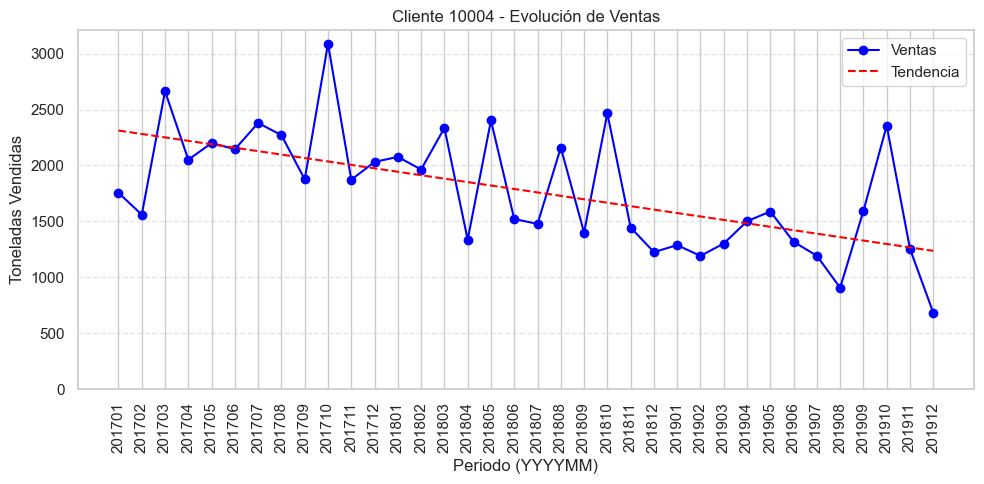

2025-05-27 21:16:42,481 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,482 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,482 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,483 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


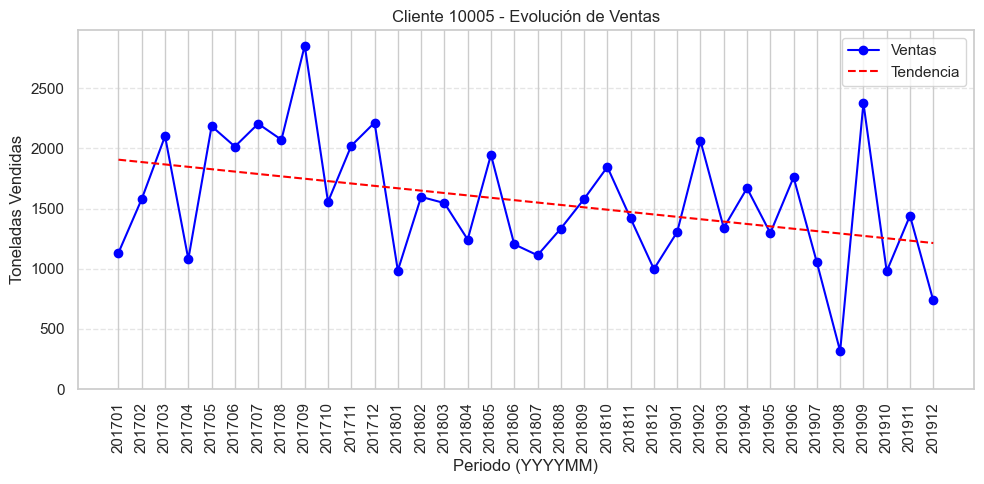

2025-05-27 21:16:42,688 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,689 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,690 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,690 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


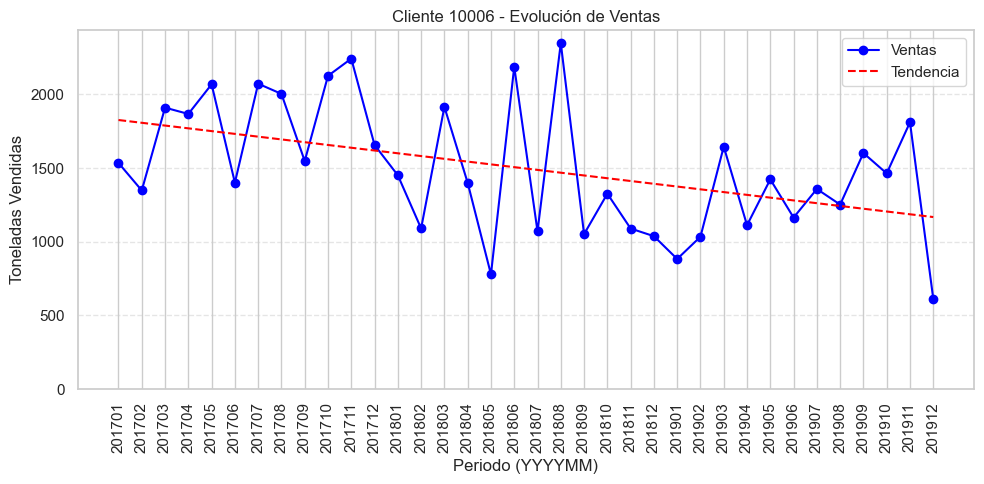

2025-05-27 21:16:42,843 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,844 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,844 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:42,845 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


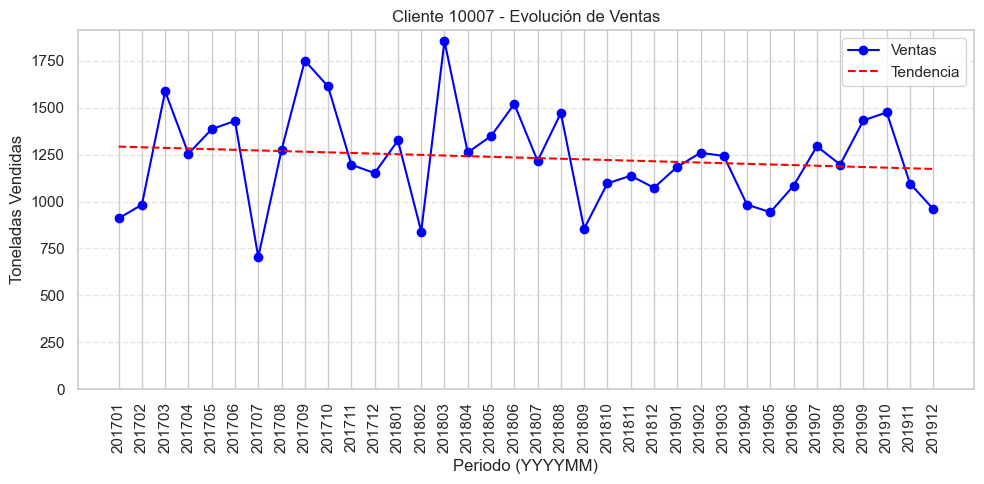

2025-05-27 21:16:43,020 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,021 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,021 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,021 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


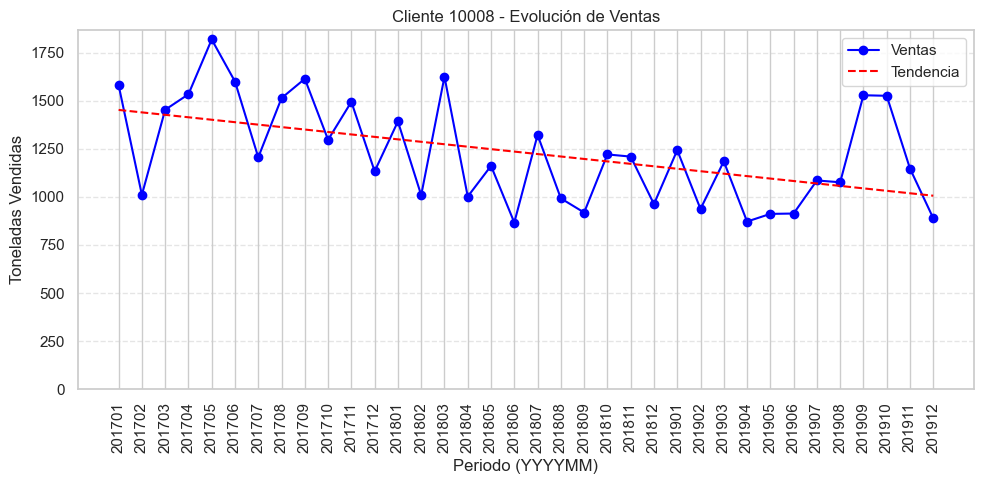

2025-05-27 21:16:43,179 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,180 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,180 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,181 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


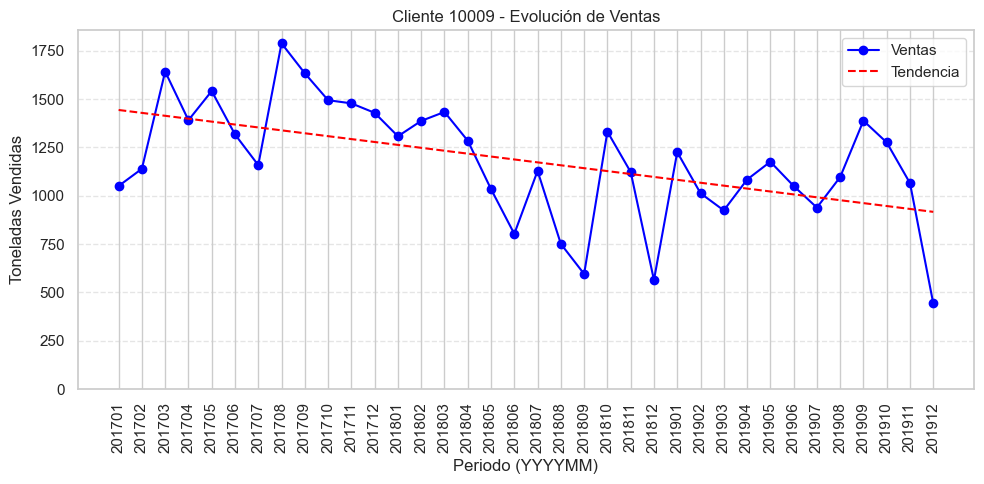

2025-05-27 21:16:43,341 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,341 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,342 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,342 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


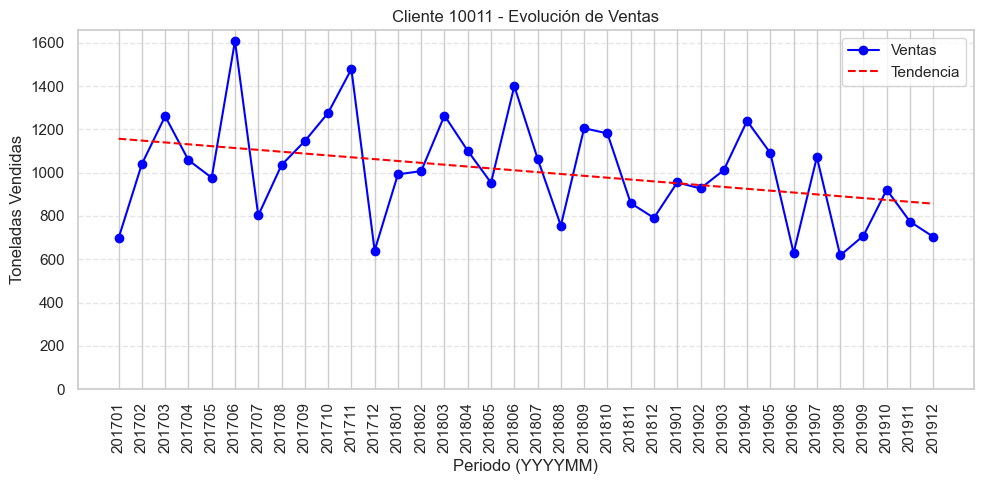

2025-05-27 21:16:43,501 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,501 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,502 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,502 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


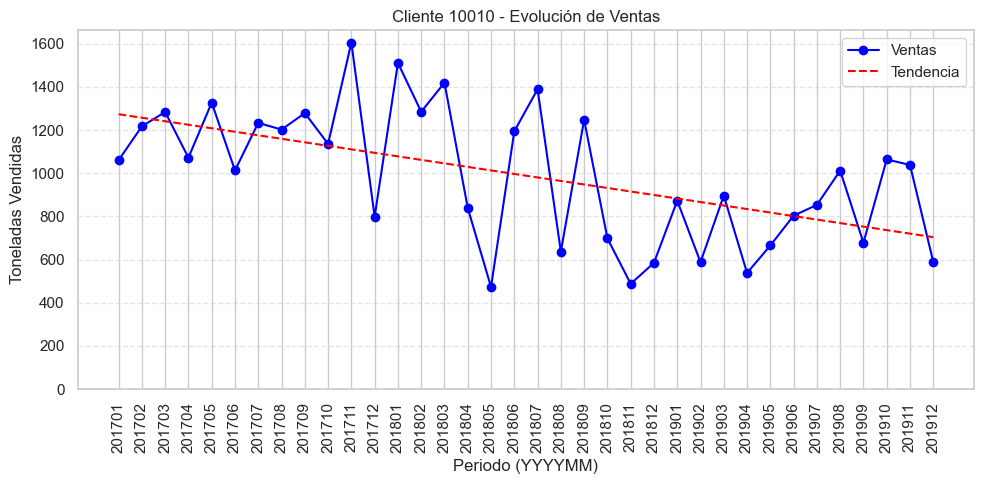

2025-05-27 21:16:43,669 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,670 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,671 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,671 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


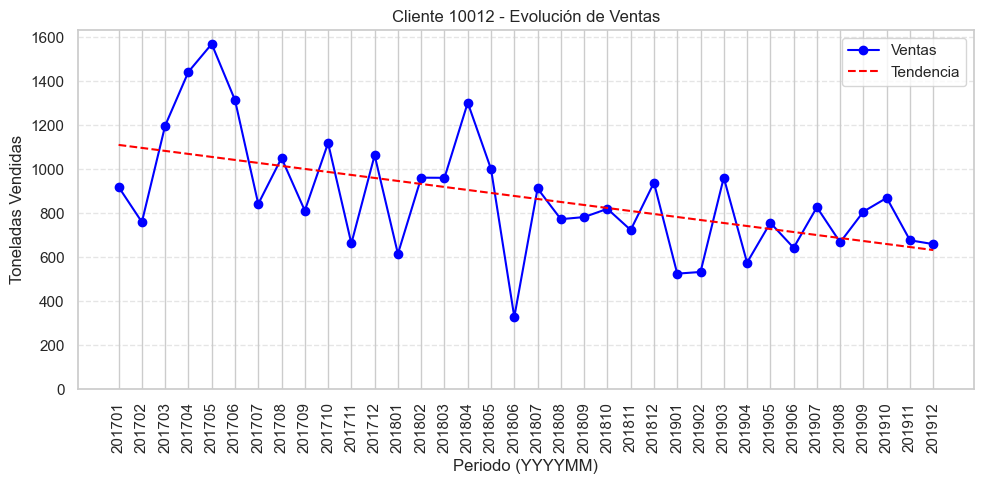

2025-05-27 21:16:43,840 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,840 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,841 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:43,841 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


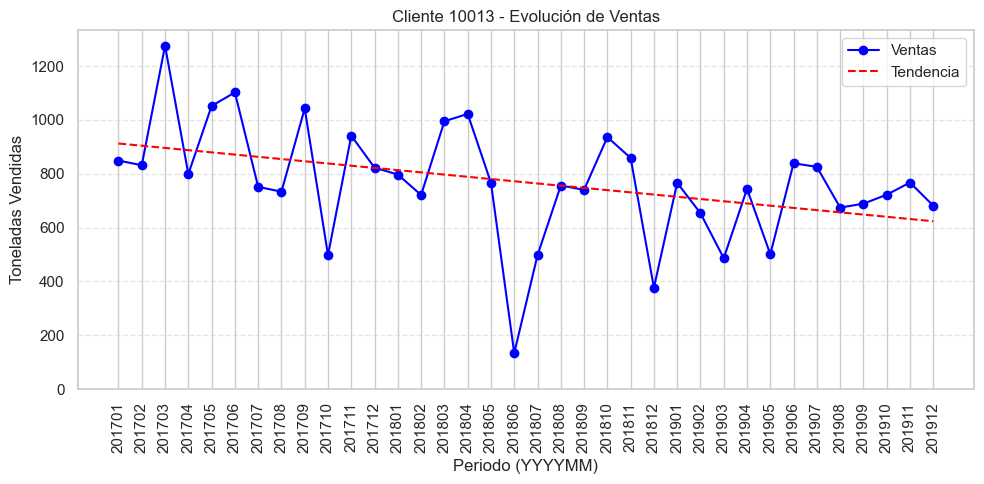

In [124]:


# Asegurar que 'periodo' es string
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Top 13 clientes por volumen total
top_clientes = df_joined.groupby("customer_id")["tn"].sum().sort_values(ascending=False).head(13).index.tolist()

# Filtrar para esos clientes
df_top_clientes = df_joined[df_joined["customer_id"].isin(top_clientes)].copy()

# Agrupar por periodo y cliente
ventas_clientes = df_top_clientes.groupby(["periodo", "customer_id"])["tn"].sum().reset_index()

# Generar un gráfico por cliente
for cliente_id in top_clientes:
    df_cliente = ventas_clientes[ventas_clientes["customer_id"] == cliente_id].copy()
    df_cliente = df_cliente.sort_values("periodo")
    
    x_vals = np.arange(len(df_cliente))
    y_vals = df_cliente["tn"].values
    etiquetas = df_cliente["periodo"]

    # Tendencia lineal
    if len(x_vals) > 1:
        z = np.polyfit(x_vals, y_vals, 1)
        tendencia = np.poly1d(z)
    
        # Gráfico
        plt.figure(figsize=(10, 5))
        plt.plot(etiquetas, y_vals, marker='o', label="Ventas", color='blue')
        plt.plot(etiquetas, tendencia(x_vals), linestyle='--', color='red', label="Tendencia")

        plt.title(f"Cliente {cliente_id} - Evolución de Ventas")
        plt.xlabel("Periodo (YYYYMM)")
        plt.ylabel("Toneladas Vendidas")
        plt.xticks(rotation=90)
        plt.ylim(bottom=0)
        plt.grid(True, axis='y', linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()


2025-05-27 21:16:44,529 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:44,530 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


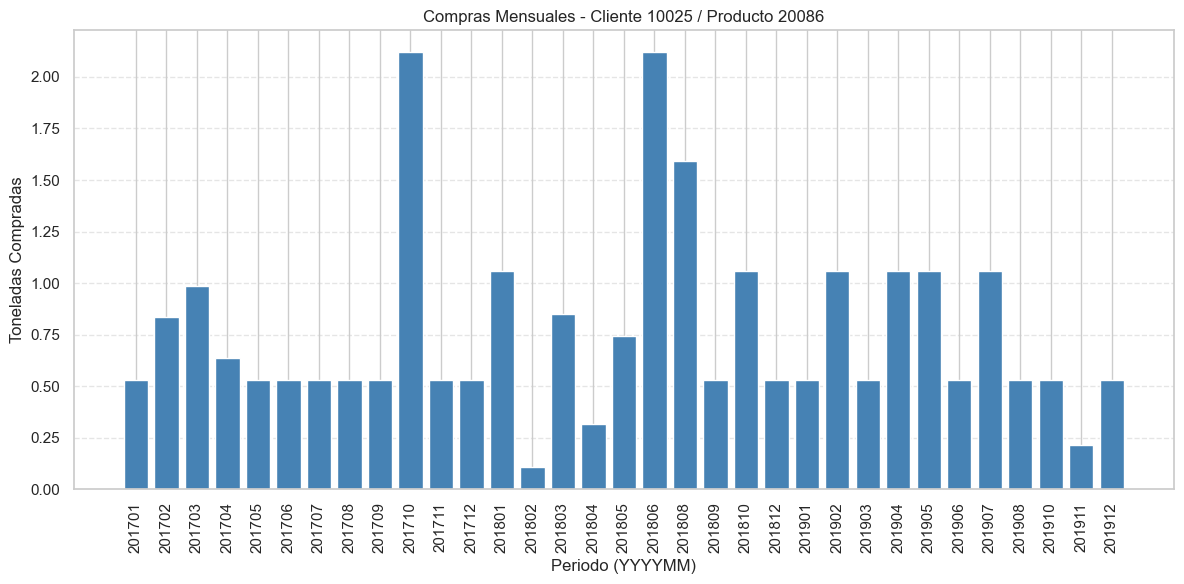

In [125]:


# Parámetros
cliente_id = 10025
producto_id = 20086

# Asegurar tipos
df_joined["customer_id"] = df_joined["customer_id"].astype(int)
df_joined["product_id"] = df_joined["product_id"].astype(str)
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Validaciones
cliente_existe = cliente_id in df_joined["customer_id"].unique()
producto_existe = str(producto_id) in df_joined["product_id"].unique()

if not cliente_existe and not producto_existe:
    print(f" El cliente {cliente_id} y el producto {producto_id} no existen en los datos.")
elif not cliente_existe:
    print(f" El cliente {cliente_id} no existe en los datos.")
elif not producto_existe:
    print(f" El producto {producto_id} no existe en los datos.")
else:
    # Filtrar por cliente y producto
    df_filtro = df_joined[
        (df_joined["customer_id"] == cliente_id) &
        (df_joined["product_id"] == str(producto_id))
    ].copy()

    if df_filtro.empty:
        print(f"🔍 Cliente {cliente_id} y producto {producto_id} existen, pero no tienen registros conjuntos.")
    else:
        # Agrupar por período
        df_compras = df_filtro.groupby("periodo")["tn"].sum().reset_index()

        # Graficar
        plt.figure(figsize=(12, 6))
        plt.bar(df_compras["periodo"], df_compras["tn"], color="steelblue")
        plt.title(f"Compras Mensuales - Cliente {cliente_id} / Producto {producto_id}")
        plt.xlabel("Periodo (YYYYMM)")
        plt.ylabel("Toneladas Compradas")
        plt.xticks(rotation=90)
        plt.ylim(bottom=0)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


## Conversión y validación de fechas

In [126]:
# Si 'periodo' es una fecha o string con formato de fecha, convertirla
try:
    df_sellin['periodo'] = pd.to_datetime(df_sellin['periodo'], errors='coerce')
except Exception as e:
    print(f'Error al convertir la columna periodo: {e}')

## Detección de valores negativos en ventas

In [127]:
print('Registros con tn negativas:')
df_sellin[df_sellin['tn'] < 0]

Registros con tn negativas:


Empty DataFrame
Columns: [periodo, customer_id, product_id, plan_precios_cuidados, cust_request_qty, cust_request_tn, tn, anio]
Index: []

## Descomposición estacional de un producto ejemplo

In [128]:
# Seleccionar un product_id con mayor volumen
producto_ejemplo = productos_top_80[0]

In [129]:
print(f'Producto de ejemplo: {producto_ejemplo}')

Producto de ejemplo: 20001


In [130]:
print(df_top_80.head())

     periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  cust_request_tn       tn
953   201701        10037       20158                      0                 1          0.05460  0.05460
954   201701        10088       20158                      0                 1          0.10920  0.10920
955   201701        10090       20158                      0                 3          0.21840  0.21840
956   201701        10209       20158                      0                 2          0.09555  0.09555
957   201701        10237       20158                      0                 1          0.05460  0.05460


Columnas de df_evolucion: Index(['periodo', 'product_id', 'tn'], dtype='object')


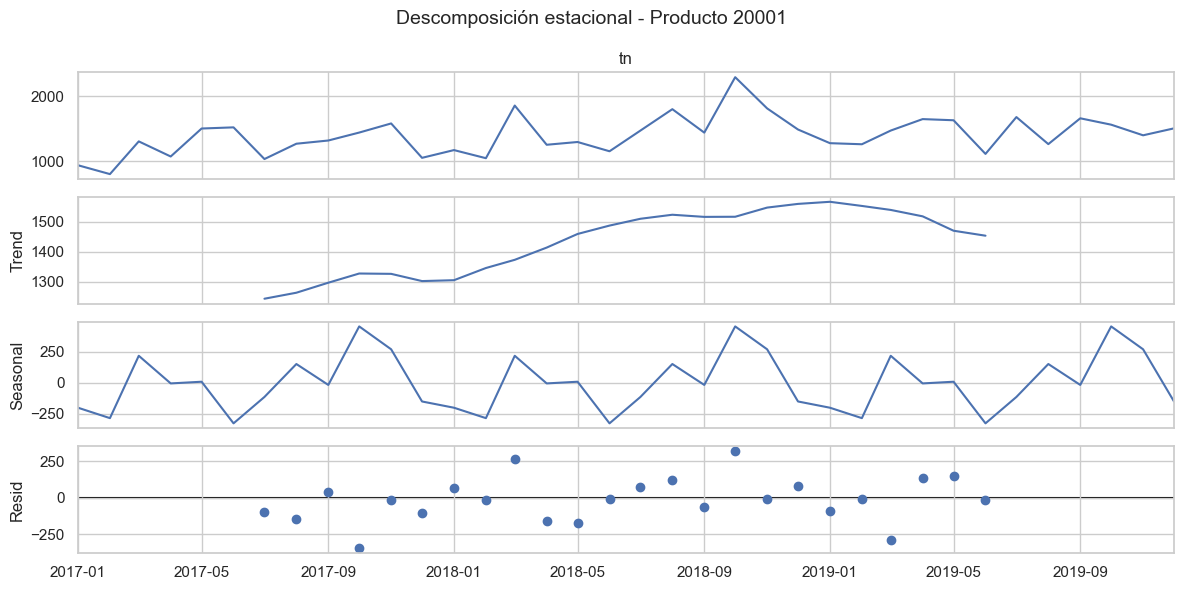

In [131]:
# Si df_evolucion no existe o no tiene las columnas correctas, recrearlo
if 'df_evolucion' not in globals() or 'periodo' not in df_evolucion.columns or 'tn' not in df_evolucion.columns:
	df_evolucion = df_top_80.groupby(["periodo", "product_id"])["tn"].sum().reset_index()

print("Columnas de df_evolucion:", df_evolucion.columns)

# Usar el nombre correcto de columna para product_id
col_prod = 'product_id' if 'product_id' in df_evolucion.columns else df_evolucion.columns[1]

# Seleccionar un product_id del top
producto_ejemplo = df_evolucion[col_prod].unique()[0]

# Filtrar ese producto
df_producto = df_evolucion[df_evolucion[col_prod] == producto_ejemplo].copy()

# Convertir 'periodo' (YYYYMM) a datetime
df_producto['periodo'] = pd.to_datetime(df_producto['periodo'].astype(str), format='%Y%m')

# Ordenar y setear índice
df_producto = df_producto.sort_values('periodo')
df_producto.set_index('periodo', inplace=True)

# Asegurar frecuencia mensual para la serie temporal
df_producto = df_producto.asfreq('MS')

# Descomposición estacional
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df_producto['tn'], model='additive', period=12)
resultado.plot()
plt.suptitle(f'Descomposición estacional - Producto {producto_ejemplo}', fontsize=14)
plt.tight_layout()
plt.show()


In [132]:
# Verificar columnas disponibles
print("Columnas de df_evolucion:", df_evolucion.columns.tolist())

Columnas de df_evolucion: ['periodo', 'product_id', 'tn']


## Ventas acumuladas y media móvil

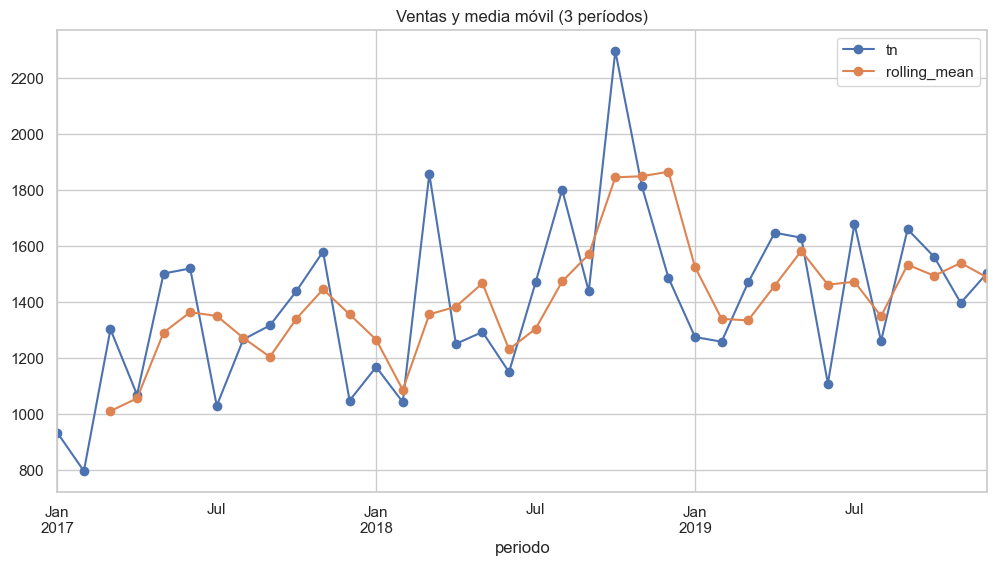

In [133]:
df_producto['rolling_mean'] = df_producto['tn'].rolling(window=3).mean()
df_producto[['tn', 'rolling_mean']].plot(figsize=(12,6), marker='o');
plt.title('Ventas y media móvil (3 períodos)');
plt.grid(True);

## Checklist de validaciones realizadas

In [134]:
print("Checklist:")
print("- [x] Limpieza de nombres de columnas")
print("- [x] Conversión de fechas")
print("- [x] Detección de valores nulos y duplicados")
print("- [x] Agrupación por Top 80% de productos")
print("- [x] Visualización de evolución temporal")
print("- [x] Descomposición estacional para un producto")
print("- [x] Cálculo de media móvil")

Checklist:
- [x] Limpieza de nombres de columnas
- [x] Conversión de fechas
- [x] Detección de valores nulos y duplicados
- [x] Agrupación por Top 80% de productos
- [x] Visualización de evolución temporal
- [x] Descomposición estacional para un producto
- [x] Cálculo de media móvil


In [135]:
# Obtener el listado de productos que sí se han vendido
productos_vendidos = df_sellin['product_id'].unique()
print("Cantidad de productos vendidos:", len(productos_vendidos))

# Filtrar productos que NO están en la lista de vendidos
productos_no_vendidos = df_productos[~df_productos['product_id'].isin(productos_vendidos)]

# Mostrar los productos no vendidos
print("Cantidad de productos no vendidos:", productos_no_vendidos.shape[0])
productos_no_vendidos.head()

print("Productos no vendidos:", productos_no_vendidos['product_id'].tolist())


Cantidad de productos vendidos: 1233
Cantidad de productos no vendidos: 63
Productos no vendidos: ['20740', '21052', '20916', '20889', '20834', '21175', '20867', '20734', '20934', '21115', '21107', '21004', '20896', '21060', '21243', '21177', '20900', '20688', '20911', '21145', '21089', '21250', '21258', '21251', '21254', '21280', '20921', '21017', '20875', '21166', '21134', '21104', '20871', '20695', '20950', '21197', '21127', '21103', '21123', '21186', '21187', '21141', '21136', '21183', '20753', '20279', '20204', '21235', '21205', '21138', '21221', '21236', '21231', '21132', '21204', '21072', '21012', '21053', '21025', '21121', '21101', '21000', '20842']


In [136]:

print(productos_no_vendidos[['product_id', 'brand', 'sku_size']].head(10))
# Verificar si hay productos no vendidos
if productos_no_vendidos.empty:
    print("Todos los productos han sido vendidos.")
else:
    print(f"Hay {productos_no_vendidos.shape[0]} productos que no se han vendido.")
    print("Listado de productos no vendidos:")
    print(productos_no_vendidos[['product_id', 'brand', 'sku_size']].head(10))
# Verificar si hay productos no vendidos
if productos_no_vendidos.empty:
    print("Todos los productos han sido vendidos.")
else:
    print(f"Hay {productos_no_vendidos.shape[0]} productos que no se han vendido.")
    print("Listado de productos no vendidos:")
    print(productos_no_vendidos[['product_id', 'brand', 'sku_size']].head(10))      

    product_id    brand sku_size
7        20740  LIMPIEX      500
16       21052  LIMPIEX        2
149      20916  MUSCULO     5000
193      20889  MUSCULO      375
194      20834  MUSCULO      400
265      21175    NIVEA      930
269      20867    NIVEA      200
270      20734    NIVEA      400
271      20934    NIVEA      750
324      21115    NIVEA       89
Hay 63 productos que no se han vendido.
Listado de productos no vendidos:
    product_id    brand sku_size
7        20740  LIMPIEX      500
16       21052  LIMPIEX        2
149      20916  MUSCULO     5000
193      20889  MUSCULO      375
194      20834  MUSCULO      400
265      21175    NIVEA      930
269      20867    NIVEA      200
270      20734    NIVEA      400
271      20934    NIVEA      750
324      21115    NIVEA       89
Hay 63 productos que no se han vendido.
Listado de productos no vendidos:
    product_id    brand sku_size
7        20740  LIMPIEX      500
16       21052  LIMPIEX        2
149      20916  MUSCULO    

In [137]:
# Asegurarse de que los nombres de columnas estén en minúsculas y sin espacios
df_sellin.columns = df_sellin.columns.str.strip().str.lower().str.replace(" ", "_")

# Ver todos los clientes únicos en el dataset (los que realizaron alguna compra)
clientes_con_compras = df_sellin['customer_id'].unique()
print("Cantidad de clientes con compras:", len(clientes_con_compras))

# Si suponés que deberías tener un rango más amplio de clientes,
# podés crear un conjunto de todos los posibles (ejemplo: del 1 al 20000)
todos_los_clientes = set(range(1, 20001))  # Ajustá el rango según corresponda

# Determinar clientes que NO aparecen en las ventas
clientes_sin_compras = todos_los_clientes - set(clientes_con_compras)

# Mostrar algunos de ellos
print("Cantidad de clientes sin compras:", len(clientes_sin_compras))
print("Ejemplos:", list(clientes_sin_compras)[:10])


Cantidad de clientes con compras: 597
Cantidad de clientes sin compras: 19403
Ejemplos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [138]:
# Asegurarse de que la columna 'periodo' sea datetime
df_sellin['periodo'] = pd.to_datetime(df_sellin['periodo'], format='%Y%m')
df_sellin['anio'] = df_sellin['periodo'].dt.year

# Agrupamos ventas por producto y año
ventas_agregadas = df_sellin.groupby(['product_id', 'anio'])['tn'].sum().reset_index()
print("Ventas agregadas por producto y año:")
print(ventas_agregadas.head())

# Pivot para tener años como columnas
ventas_pivot = ventas_agregadas.pivot(index='product_id', columns='anio', values='tn').fillna(0)

# Identificar años sin ventas para cada producto
ventas_pivot['anios_sin_venta'] = ventas_pivot.apply(
    lambda row: [col for col in ventas_pivot.columns[:-1] if row[col] == 0],
    axis=1
)

# Filtrar solo productos con al menos un año sin ventas
productos_con_faltantes = ventas_pivot[ventas_pivot['anios_sin_venta'].apply(len) > 0]

# Mostrar resultados
print("Productos con al menos un año sin ventas:", productos_con_faltantes.shape[0])
productos_con_faltantes.head()


Ventas agregadas por producto y año:
  product_id  anio           tn
0      20001  1970  50340.39558
1      20002  1970  36337.25439
2      20003  1970  32004.15274
3      20004  1970  24178.15379
4      20005  1970  23191.21852
Productos con al menos un año sin ventas: 0


Empty DataFrame
Columns: [1970, anios_sin_venta]
Index: []

In [139]:
# Asegurar formato datetime
df_sellin['periodo'] = pd.to_datetime(df_sellin['periodo'], format='%YYYY%mm')

# Crear columna "mes_año" para 36 períodos (ej: '2021-01', '2021-02', ...)
df_sellin['mes_anio'] = df_sellin['periodo'].dt.to_period('M').astype(str)

# Agrupar por producto y mes, sumando toneladas vendidas
ventas_mensuales = df_sellin.groupby(['product_id', 'mes_anio'])['tn'].sum().reset_index()

# Pivotear para obtener 36 columnas (una por mes)
ventas_36p = ventas_mensuales.pivot(index='product_id', columns='mes_anio', values='tn').fillna(0)

# Agregar columna indicando en qué meses NO hubo ventas
ventas_36p['meses_sin_ventas'] = ventas_36p.apply(
    lambda row: [col for col in ventas_36p.columns[:-1] if row[col] == 0],
    axis=1
)

# Filtrar productos que tengan al menos un mes sin ventas
productos_con_faltantes_mensuales = ventas_36p[ventas_36p['meses_sin_ventas'].apply(len) > 0]

# Mostrar
print("Productos con al menos un mes sin ventas:", productos_con_faltantes_mensuales.shape[0])
productos_con_faltantes_mensuales.head()


Productos con al menos un mes sin ventas: 0


Empty DataFrame
Columns: [1970-01, meses_sin_ventas]
Index: []

/var/folders/yp/cyy5yk8j11g984vg2n1w2l_w0000gn/T/ipykernel_59463/1600772930.py:24: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



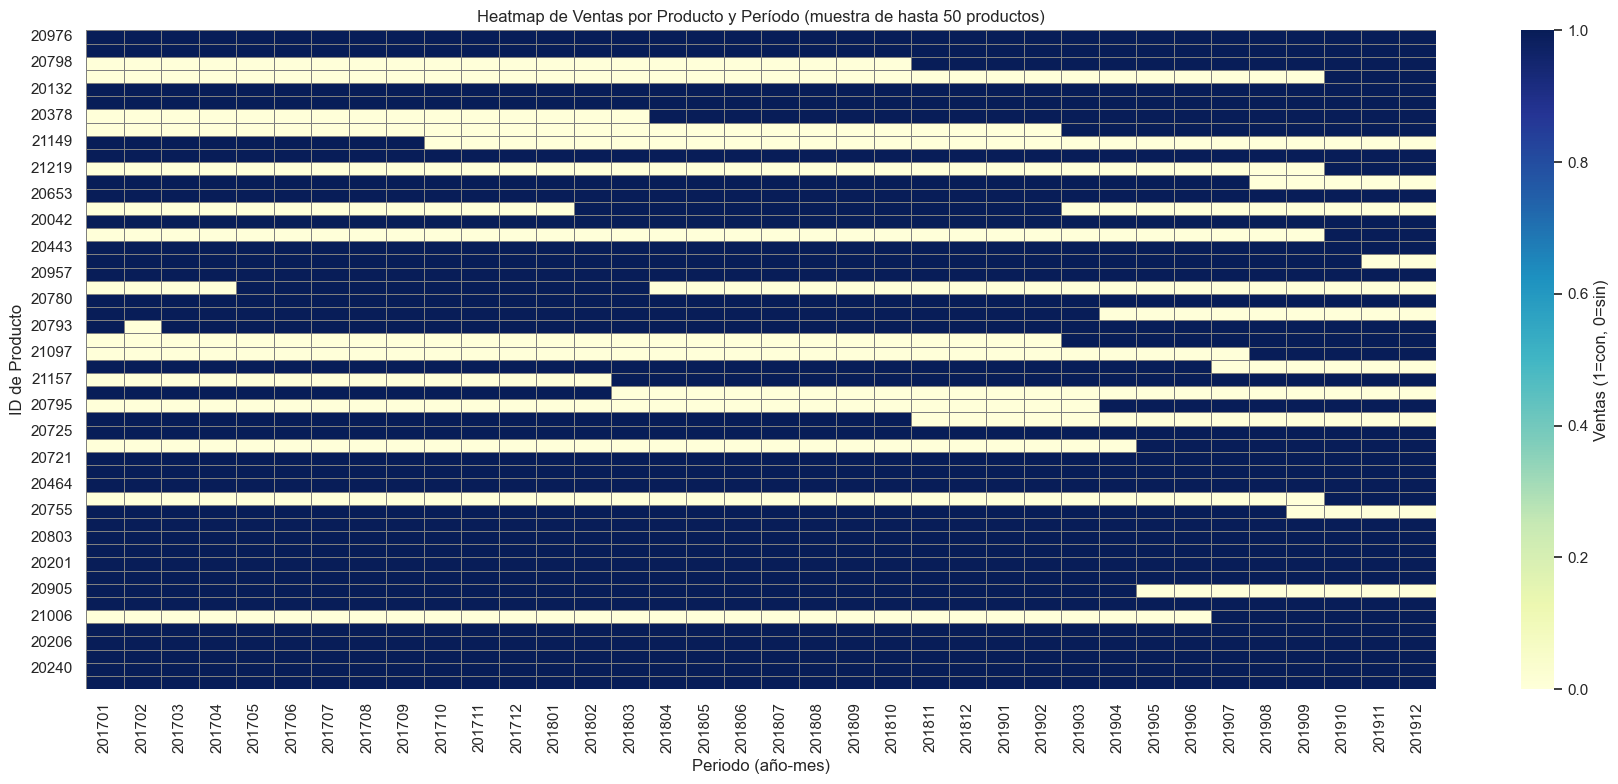

In [140]:
# 1. Asegurar que 'periodo' sea string
df_sellin['periodo'] = df_sellin['periodo'].astype(str)

# 2. Agrupar toneladas por producto y período
ventas_por_periodo = df_sellin.groupby(['product_id', 'periodo'])['tn'].sum().reset_index()

# 3. Pivotear: columnas = períodos, filas = productos
ventas_pivot = ventas_por_periodo.pivot(index='product_id', columns='periodo', values='tn').fillna(0)

# 4. Limpiar nombres de columnas si se desformatearon
ventas_pivot.columns = [
    str(col)[-6:] if str(col).startswith("1970-01-01") else col
    for col in ventas_pivot.columns
]

# 5. Recalcular columna de períodos sin venta
ventas_pivot['periodos_sin_venta'] = ventas_pivot.apply(
    lambda row: [col for col in ventas_pivot.columns if col != 'periodos_sin_venta' and row[col] == 0],
    axis=1
)

# 6. Crear un DataFrame binario para visualizar el heatmap (0 = sin venta, 1 = con venta)
ventas_binarias = ventas_pivot.drop(columns='periodos_sin_venta').copy()
ventas_binarias = ventas_binarias.applymap(lambda x: 0 if x == 0 else 1)

# 7. Visualización con heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    ventas_binarias.sample(n=min(50, ventas_binarias.shape[0])),  # Muestra 50 productos como máximo
    cmap="YlGnBu",
    cbar_kws={'label': 'Ventas (1=con, 0=sin)'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Heatmap de Ventas por Producto y Período (muestra de hasta 50 productos)")
plt.xlabel("Periodo (año-mes)")
plt.ylabel("ID de Producto")
plt.tight_layout()
plt.show()



2025-05-27 21:16:52,687 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:16:52,687 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


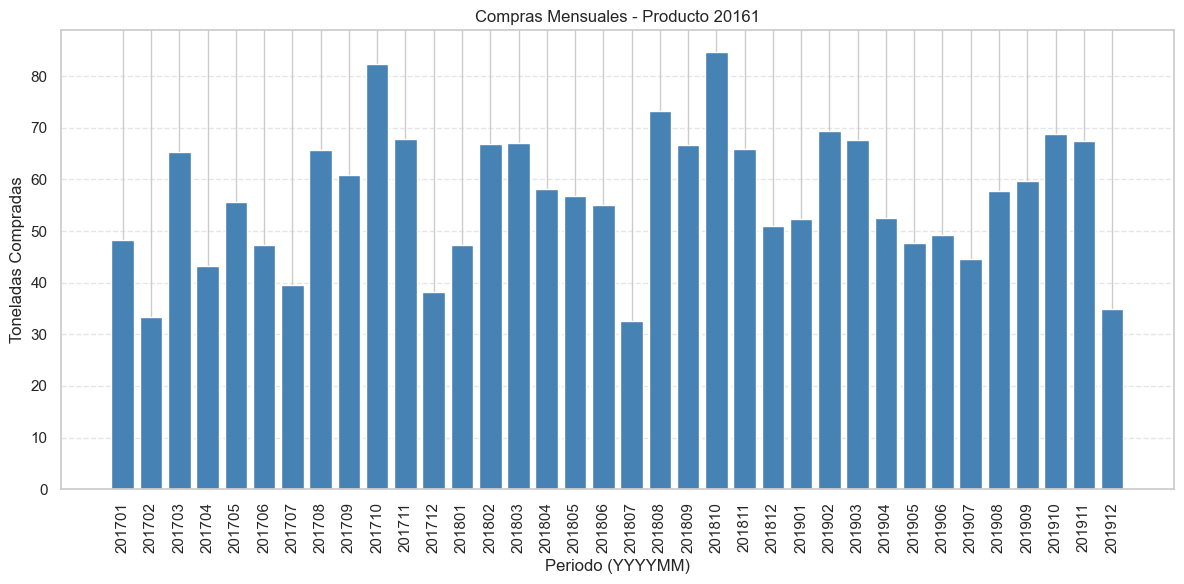

In [141]:


# Parámetros
cliente_id = 10046
producto_id = 20161

# Asegurar tipos
df_joined["customer_id"] = df_joined["customer_id"].astype(int)
df_joined["product_id"] = df_joined["product_id"].astype(str)
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Validaciones
cliente_existe = cliente_id in df_joined["customer_id"].unique()
producto_existe = str(producto_id) in df_joined["product_id"].unique()

if  not producto_existe:
    print(f" El producto {producto_id} no existe en los datos.")
else:
    # Filtrar por cliente y producto
    df_filtro = df_joined[
        (df_joined["product_id"] == str(producto_id))
    ].copy()

    if df_filtro.empty:
        print(f"🔍 Producto {producto_id} existen, pero no tienen registros de ventas.")
    else:
        # Agrupar por período
        df_compras = df_filtro.groupby("periodo")["tn"].sum().reset_index()

        # Graficar
        plt.figure(figsize=(12, 6))
        plt.bar(df_compras["periodo"], df_compras["tn"], color="steelblue")
        plt.title(f"Compras Mensuales - Producto {producto_id}")
        plt.xlabel("Periodo (YYYYMM)")
        plt.ylabel("Toneladas Compradas")
        plt.xticks(rotation=90)
        plt.ylim(bottom=0)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


/var/folders/yp/cyy5yk8j11g984vg2n1w2l_w0000gn/T/ipykernel_59463/1522246241.py:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



            ceros_al_inicio  racha_sin_ventas
product_id                                   
20770                    35                35
20792                    35                35
20854                    35                35
20728                    34                34
20436                    33                33
20437                    33                33
20487                    33                33
20515                    33                33
20631                    33                33
20671                    33                33
20764                    33                33
20779                    33                33
20799                    33                33
20888                    33                33
20895                    33                33
20915                    33                33
20923                    33                33
20926                    33                33
20929                    33                33
20940                    33       

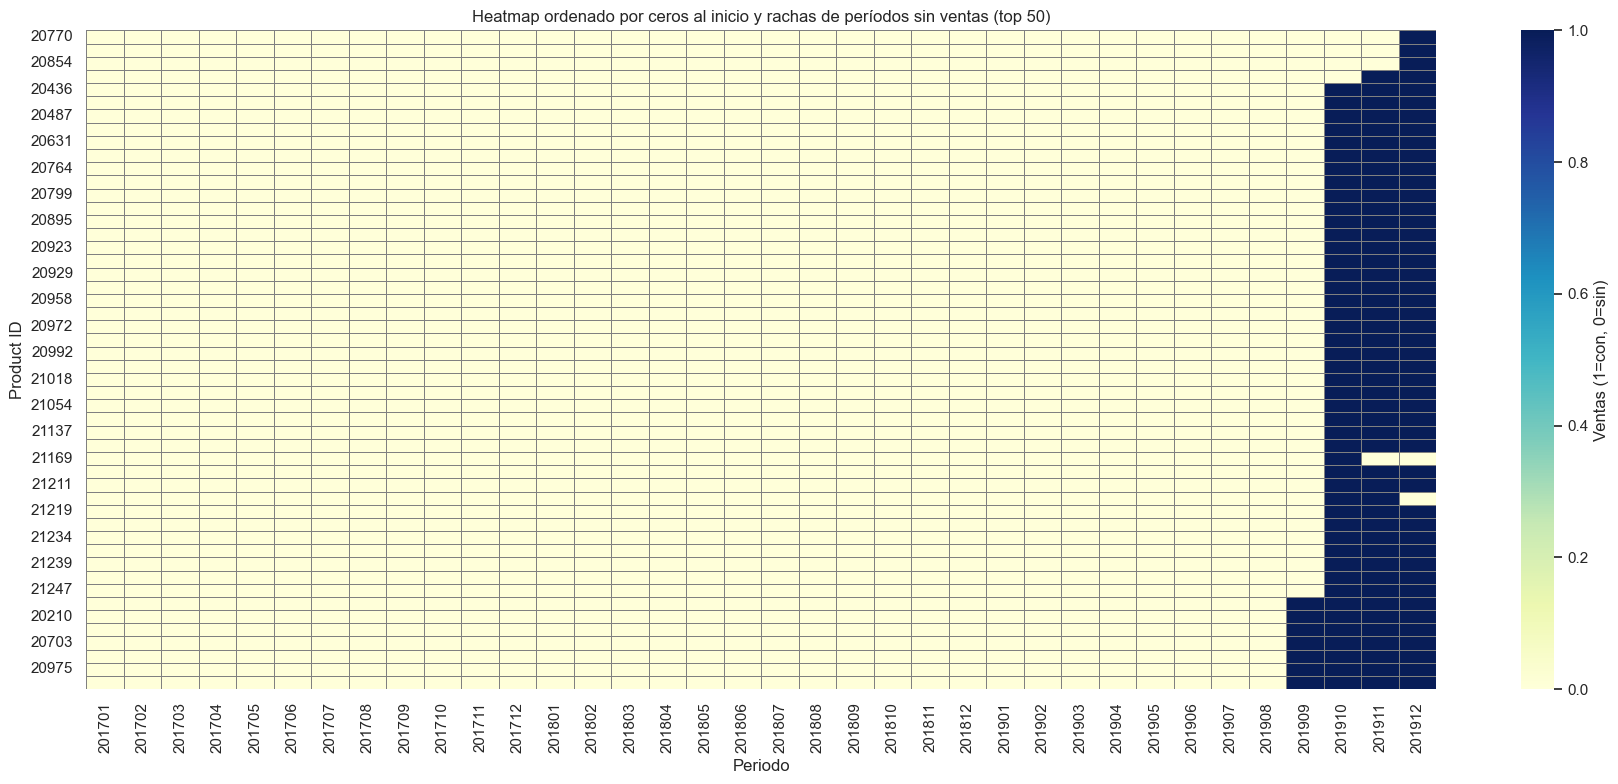

In [142]:

# 1. Asegurar que 'periodo' sea string
df_sellin['periodo'] = df_sellin['periodo'].astype(str)

# 2. Agrupar toneladas por producto y período
ventas_por_periodo = df_sellin.groupby(['product_id', 'periodo'])['tn'].sum().reset_index()

# 3. Pivotear: columnas = períodos, filas = productos
ventas_pivot = ventas_por_periodo.pivot(index='product_id', columns='periodo', values='tn').fillna(0)

ventas_pivot.columns = ventas_pivot.columns.astype(str)

ventas_pivot.columns = [str(col)[-6:] for col in ventas_pivot.columns]

# 5. Crear DataFrame binario: 1 = con venta, 0 = sin venta
ventas_binarias = ventas_pivot.applymap(lambda x: 0 if x == 0 else 1)

# 6. Calcular la racha más larga de ceros consecutivos
def max_consecutive_zeros(row):
    max_zeros = 0
    current_zeros = 0
    for val in row:
        if val == 0:
            current_zeros += 1
            max_zeros = max(max_zeros, current_zeros)
        else:
            current_zeros = 0
    return max_zeros

ventas_binarias['racha_sin_ventas'] = ventas_binarias.apply(max_consecutive_zeros, axis=1)

# 7. Calcular cantidad de ceros consecutivos al inicio
def count_leading_zeros(row):
    count = 0
    for val in row:
        if val == 0:
            count += 1
        else:
            break
    return count

ventas_binarias['ceros_al_inicio'] = ventas_binarias.drop(columns=['racha_sin_ventas']).apply(count_leading_zeros, axis=1)

# 8. Ordenar primero por ceros al inicio, luego por racha más larga
productos_ordenados = ventas_binarias.sort_values(by=['ceros_al_inicio', 'racha_sin_ventas'], ascending=False)

# 9. Mostrar tabla completa ordenada
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(productos_ordenados[['ceros_al_inicio', 'racha_sin_ventas']])

# 10. Visualización heatmap para los top 50
plt.figure(figsize=(18, 8))
# Asegurar que las columnas sean strings para el eje X del heatmap
productos_ordenados.columns = productos_ordenados.columns.astype(str)

sns.heatmap(
    productos_ordenados.drop(columns=['ceros_al_inicio', 'racha_sin_ventas']).head(50),
    cmap="YlGnBu",
    cbar_kws={'label': 'Ventas (1=con, 0=sin)'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Heatmap ordenado por ceros al inicio y rachas de períodos sin ventas (top 50)")
plt.xlabel("Periodo")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


/var/folders/yp/cyy5yk8j11g984vg2n1w2l_w0000gn/T/ipykernel_59463/2706462346.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



            ceros_al_final
product_id                
21285                   35
21297                   35
21295                   35
21275                   35
21286                   35
21287                   35
21199                   34
21230                   34
21282                   34
21272                   33
21277                   33
21240                   31
21253                   31
21289                   30
21160                   30
21158                   30
21232                   30
21241                   30
21165                   30
21278                   30
21193                   30
21284                   30
21268                   30
21172                   29
21225                   29
21210                   28
21066                   28
20591                   28
21096                   28
21223                   28
21098                   28
21299                   28
21100                   28
21298                   28
21296                   28
2

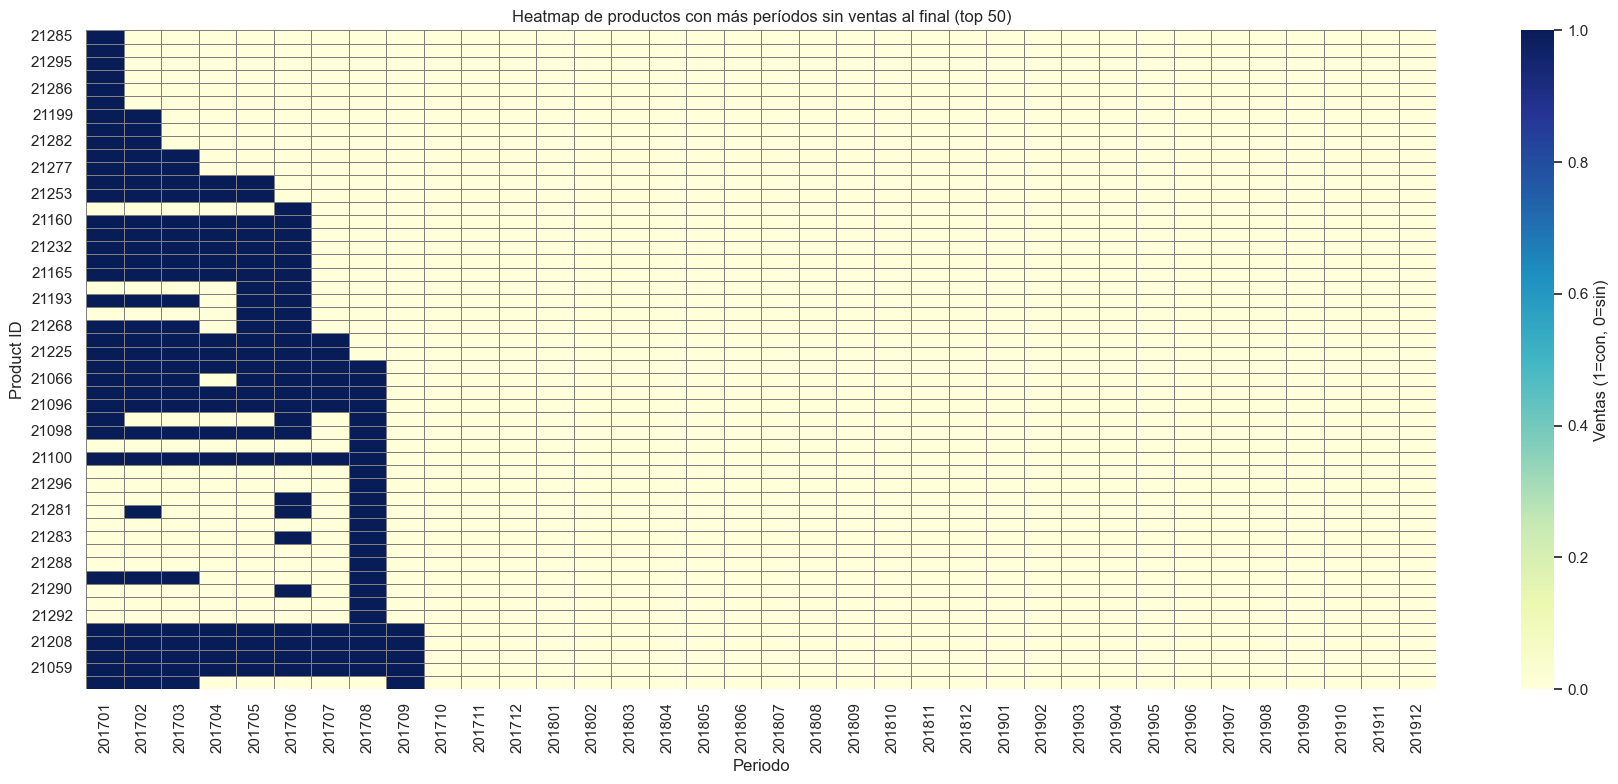

In [143]:
# 7 bis. Calcular cantidad de ceros consecutivos al final
def count_trailing_zeros(row):
    count = 0
    for val in reversed(row):
        if val == 0:
            count += 1
        else:
            break
    return count

ventas_binarias['ceros_al_final'] = ventas_binarias.drop(columns=['ceros_al_inicio', 'racha_sin_ventas']).apply(count_trailing_zeros, axis=1)


# Ordenar por ceros al final
productos_con_ceros_finales = ventas_binarias.sort_values(by='ceros_al_final', ascending=False)

# Mostrar tabla completa ordenada por ceros al final
print(productos_con_ceros_finales[['ceros_al_final']])

# Graficar los 50 productos con más ceros al final
plt.figure(figsize=(18, 8))
sns.heatmap(
    productos_con_ceros_finales.drop(columns=['ceros_al_inicio', 'racha_sin_ventas', 'ceros_al_final']).head(50),
    cmap="YlGnBu",
    cbar_kws={'label': 'Ventas (1=con, 0=sin)'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Heatmap de productos con más períodos sin ventas al final (top 50)")
plt.xlabel("Periodo")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


In [144]:
print(df_productos[df_productos['product_id'] == 21285])

Empty DataFrame
Columns: [cat1, cat2, cat3, brand, sku_size, product_id, etiqueta]
Index: []


In [145]:
df_producto_vf = df_sellin[df_sellin['product_id']==21285]
print(df_producto_vf)

Empty DataFrame
Columns: [periodo, customer_id, product_id, plan_precios_cuidados, cust_request_qty, cust_request_tn, tn, anio, mes_anio]
Index: []


2025-05-27 21:47:31,339 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,339 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


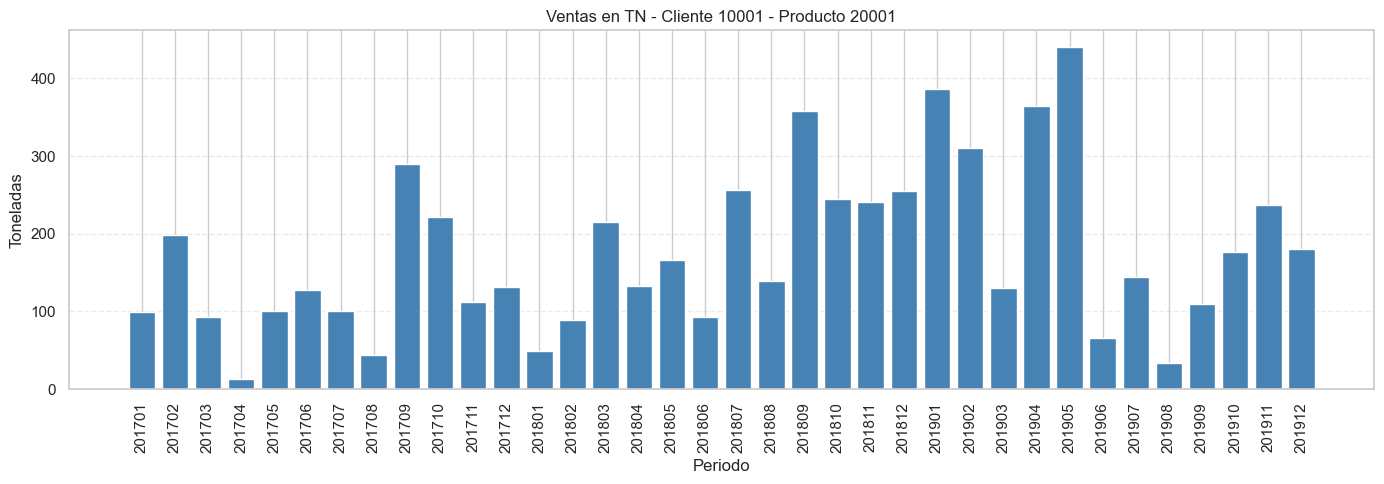

2025-05-27 21:47:31,509 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,509 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


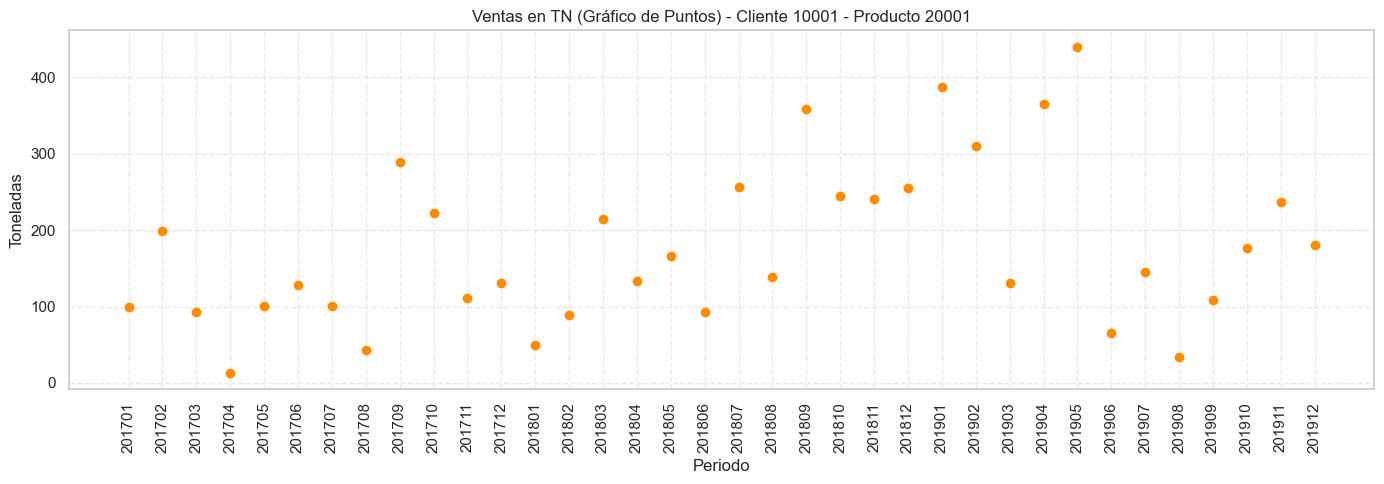

2025-05-27 21:47:31,731 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,731 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,732 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,732 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


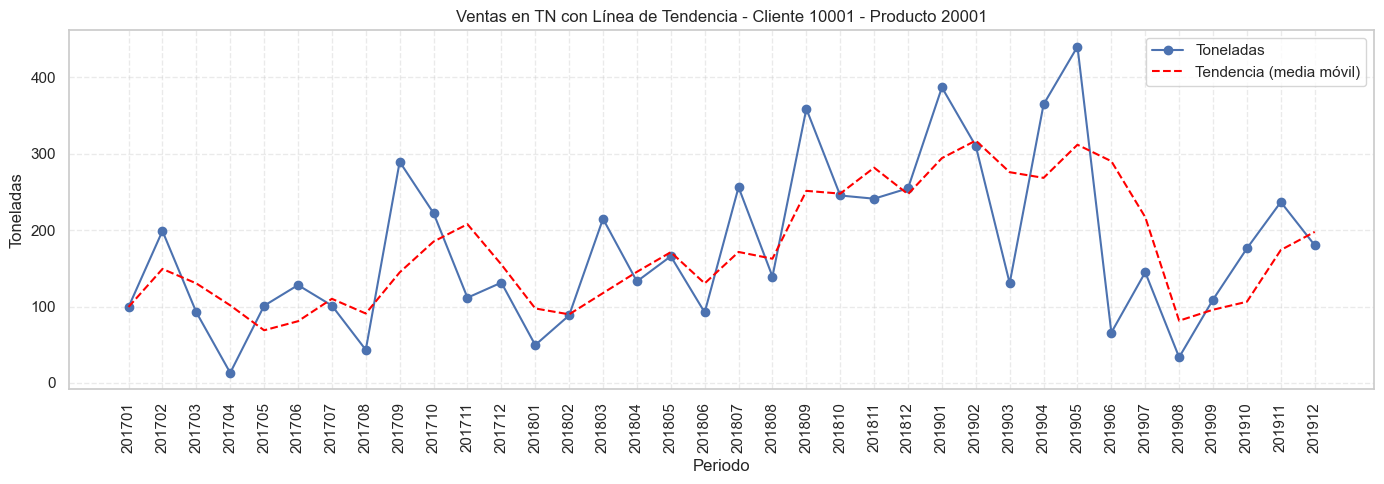


📋 Tabla de ventas y tendencia por período:


periodo      tn  tn_trend
0   201701   99.44     99.44
1   201702  198.84    149.14
2   201703   92.47    130.25
3   201704   13.30    101.54
4   201705  101.01     68.92
5   201706  128.05     80.78
6   201707  101.21    110.09
7   201708   43.34     90.86
8   201709  289.35    144.63
9   201710  222.11    184.93
10  201711  111.55    207.67
11  201712  131.27    154.98
12  201801   49.62     97.48
13  201802   88.44     89.78
14  201803  214.72    117.59
15  201804  132.83    145.33
16  201805  165.74    171.10
17  201806   92.29    130.29
18  201807  256.06    171.36
19  201808  139.24    162.53
20  201809  358.58    251.29
21  201810  245.21    247.68
22  201811  241.02    281.61
23  201812  254.62    246.95
24  201901  386.61    294.08
25  201902  309.91    317.05
26  201903  130.55    275.69
27  201904  364.37    268.28
28  201905  439.91    311.61
29  201906   65.92    290.07
30  201907  144.79    216.87
31  201908   33.64     81.45
32  201909  109.05     95.83
33  201910  176.03    106.24
34  201911  236.66    173.91
35  201912  180.22    197.63

2025-05-27 21:47:31,897 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-27 21:47:31,898 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


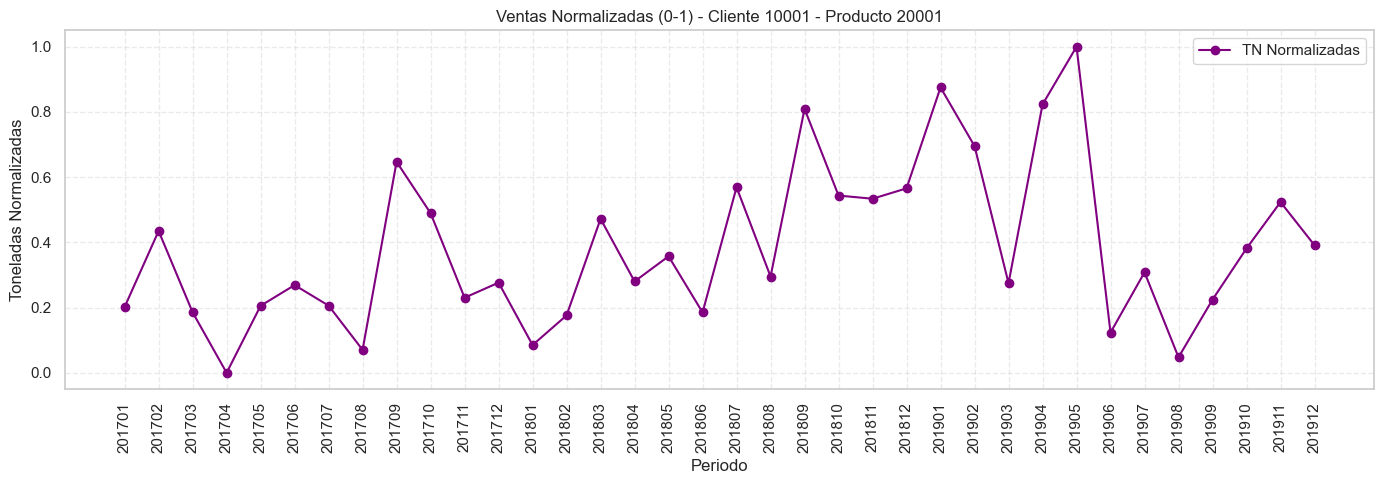

2025-05-27 22:21:00,250 - INFO     - Executing shutdown due to inactivity...
2025-05-27 22:21:00,292 - INFO     - Executing shutdown...
2025-05-27 22:21:00,294 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
# Parámetros de entrada (None si no se filtra)
cliente_id = 10001
producto_id = 20001

# Asegurar tipos
df_joined["customer_id"] = df_joined["customer_id"].astype(int)
df_joined["product_id"] = df_joined["product_id"].astype(str)
df_joined["periodo"] = df_joined["periodo"].astype(str)

# Filtrar según parámetros
df_filtro = df_joined.copy()
if cliente_id is not None:
    df_filtro = df_filtro[df_filtro["customer_id"] == cliente_id]
if producto_id is not None:
    df_filtro = df_filtro[df_filtro["product_id"] == str(producto_id)]

# Validaciones
if df_filtro.empty:
    print("No hay registros para el filtro seleccionado.")
else:
    # Agrupar por período y sumar
    df_compras = df_filtro.groupby("periodo")["tn"].sum().reset_index()

    # Rellenar todos los períodos posibles
    todos_los_periodos = sorted(df_joined["periodo"].unique())
    df_compras = df_compras.set_index("periodo").reindex(todos_los_periodos, fill_value=0).reset_index()
    df_compras.columns = ["periodo", "tn"]

    # Convertir tipos
    df_compras["periodo"] = df_compras["periodo"].astype(str)
    df_compras["tn"] = df_compras["tn"].astype(float)
    df_compras["tn_trend"] = df_compras["tn"].rolling(window=3, min_periods=1).mean()

    # Título dinámico
    if cliente_id and producto_id:
        titulo = f"Cliente {cliente_id} - Producto {producto_id}"
    elif cliente_id:
        titulo = f"Cliente {cliente_id} - Todos los Productos"
    elif producto_id:
        titulo = f"Producto {producto_id} - Todos los Clientes"
    else:
        titulo = "⚠️ Debe seleccionar al menos cliente o producto"

    # Gráfico 1: Barras
    plt.figure(figsize=(14, 5))
    plt.bar(df_compras["periodo"], df_compras["tn"], color="steelblue")
    plt.title(f"Ventas en TN - {titulo}")
    plt.xlabel("Periodo")
    plt.ylabel("Toneladas")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Puntos
    plt.figure(figsize=(14, 5))
    plt.scatter(df_compras["periodo"], df_compras["tn"], color="darkorange")
    plt.title(f"Ventas en TN (Gráfico de Puntos) - {titulo}")
    plt.xlabel("Periodo")
    plt.ylabel("Toneladas")
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Línea con tendencia
    plt.figure(figsize=(14, 5))
    plt.plot(df_compras["periodo"], df_compras["tn"], label="Toneladas", marker='o')
    plt.plot(df_compras["periodo"], df_compras["tn_trend"], label="Tendencia (media móvil)", linestyle='--', color='red')
    plt.title(f"Ventas en TN con Línea de Tendencia - {titulo}")
    plt.xlabel("Periodo")
    plt.ylabel("Toneladas")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Tabla separada con los valores
    tabla_datos = df_compras[["periodo", "tn", "tn_trend"]].copy()
    tabla_datos["tn"] = tabla_datos["tn"].round(2)
    tabla_datos["tn_trend"] = tabla_datos["tn_trend"].round(2)

    print("\n📋 Tabla de ventas y tendencia por período:")
    display(tabla_datos)  # Usar en Jupyter o Colab. Si no, usar print(tabla_datos.to_string(index=False))


    # 13. Gráfico de TN normalizadas
# Min-Max normalization
df_compras["tn_norm"] = (df_compras["tn"] - df_compras["tn"].min()) / (df_compras["tn"].max() - df_compras["tn"].min())

plt.figure(figsize=(14, 5))
plt.plot(df_compras["periodo"], df_compras["tn_norm"], label="TN Normalizadas", color="purple", marker='o')
plt.title(f"Ventas Normalizadas (0-1) - {titulo}")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Normalizadas")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()
